 This is the ensemble file listing all the analysis in the paper


In [1]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva
from src import Shap
from src import SuperLearner

In [2]:
platform = "jupyter"
params.confirm_cwd(platform)
model_params = params.model_params

cwd: /Users/valler/Python/OX_Thesis/OX_thesis


In [4]:
df = params.data_reader(dataset='HRS',source='us',bio=False)
df['death'].describe()

count    13575.000000
mean         0.300110
std          0.458323
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: death, dtype: float64

# Model Prediction


## HRS

In [10]:
df = params.data_reader(dataset='HRS',source='us',bio=False)
for model_name in ['lgb','xgb']:
    print(f'model is {model_name}-----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain='all', model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))

model is lgb-----------------
seed is 87785
imv=0.2038370443560898,
roc-auc=0.8246432517789302,
pr-auc=0.6866060054221803,
f1=0.5848540145985401,
efron_r2=0.28975000906425197,
ffc_r2=0.5635980125034004,
IP=0.2933066722795201
model is xgb-----------------
seed is 87785
imv=0.13950427649140423,
roc-auc=0.7979042175022075,
pr-auc=0.6458229924593557,
f1=0.5542168674698795,
efron_r2=0.21347014251285568,
ffc_r2=0.5167290427127114,
IP=0.2933066722795201


## SHARE

In [4]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'share_all'
# recode a new domain dict for SHARE  based on its columns
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))
# fit model
for model_name in ['lgb','xgb']:
    print(f'model is {model_name} -----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))

model is lgb -----------------
seed is 87785
imv=0.07995811998553994,
roc-auc=0.8032412874090527,
pr-auc=0.5283903453496347,
f1=0.44573643410852715,
efron_r2=0.21730539088632606,
ffc_r2=0.4605976417000187,
IP=0.2021227503461006
model is xgb -----------------
seed is 87785
imv=0.052965635671908276,
roc-auc=0.774615717794262,
pr-auc=0.48777084474272525,
f1=0.4222011385199241,
efron_r2=0.15517920388524353,
ffc_r2=0.41778271568626024,
IP=0.2021227503461006


## ELSA

In [20]:
df = params.data_reader(dataset='ELSA',source='us',bio=False)
df=df.loc[0:7731]
df['death'].replace({-1:0,1:1},inplace=True)

domain_name = 'elsa_all'
# recode a new domain dict for SHARE  based on its columns
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))

# fit model
for model_name in ['lgb','xgb']:
    print(f'model is {model_name} -----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))

model is lgb -----------------
imv=0.015471586098013782,
roc-auc=0.9099000410790086,
pr-auc=0.26582103116054573,
f1=0.12213740458015268,
efron_r2=0.10144130519615524,
ffc_r2=0.22825464401628026,
IP=0.056910569105691054
model is xgb -----------------
imv=0.008809570901578589,
roc-auc=0.8961696936501811,
pr-auc=0.2511003781086692,
f1=0.19718309859154934,
efron_r2=0.06732185193920481,
ffc_r2=0.1989504597131021,
IP=0.056910569105691054


## Combination Prediction


In [3]:
df,domain_lst = params.read_merged_data()
domain_name = 'combine_all'
model_params['domain_dict'][domain_name]=domain_lst
print(f'there are {len(domain_lst)} vars and they are \n{domain_lst}')

there are 26 vars and they are 
['modactivityYN', 'maleYN', 'everrent', 'Zfatherseduc', 'nevermarried', 'everdivorced', 'ZwealthT', 'rocc', 'Zhopelessness', 'dataset', 'migrantYN', 'currsmokeYN', 'Zpessimism', 'Zeduccat', 'sumadultAE', 'Zperceivedconstraints', 'sleepYN', 'everunemployed', 'fathersocc', 'Zposaffect', 'eversmokeYN', 'Zmotherseduc', 'Znegaffect', 'vigactivityYN', 'Zoptimism', 'age']


In [4]:
for model_name in ['lgb','xgb']:
    print(f'model is {model_name} -----------------')
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model=model_name, train_subset_size=1, order=0)
    print_model_fits(evas=metric(model))


model is lgb -----------------
imv=0.12220872894194847,
roc-auc=0.8409153474519705,
pr-auc=0.6300949522339903,
f1=0.5224476753474996,
efron_r2=0.2927094230441343,
ffc_r2=0.5289332324147182,
IP=0.22464295574910267
model is xgb -----------------
imv=0.1393862005719722,
roc-auc=0.8632039335788511,
pr-auc=0.6779311063954588,
f1=0.5710271620355917,
efron_r2=0.3468953154280685,
ffc_r2=0.5650218980998778,
IP=0.22464295574910267


# SHAP


In [122]:
df_shaps = pd.DataFrame(columns=['var'])

## HRS


In [123]:
# fit model
df = params.data_reader(dataset='HRS',source='us',bio=False)
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain='all', model='lgb',
                                     train_subset_size=1, order=0)
print_model_fits(evas=metric(model))
# calcualte shap
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


imv=0.2038370443560898,
roc-auc=0.8246432517789302,
pr-auc=0.6866060054221803,
f1=0.5848540145985401,
efron_r2=0.28975000906425197,
ffc_r2=0.5635980125034004,
IP=0.2933066722795201


In [124]:
dataset = 'HRS'
temp = pd.DataFrame([x for x in Shap.shap_absolute_rank(shap_values_test) if x[1]>=0.1],
                    columns=['var',dataset])
df_shaps =pd.merge(left= df_shaps, right = temp, left_on='var',right_on='var',how='outer')
df_shaps

var       HRS
0            age  0.941220
1         maleYN  0.226142
2    eversmokeYN  0.169687
3  vigactivityYN  0.149681
4       ZincomeT  0.141934
5       Zanxiety  0.135472
6       ZwealthT  0.111158
7           rocc  0.106647

### shap rank bar plot

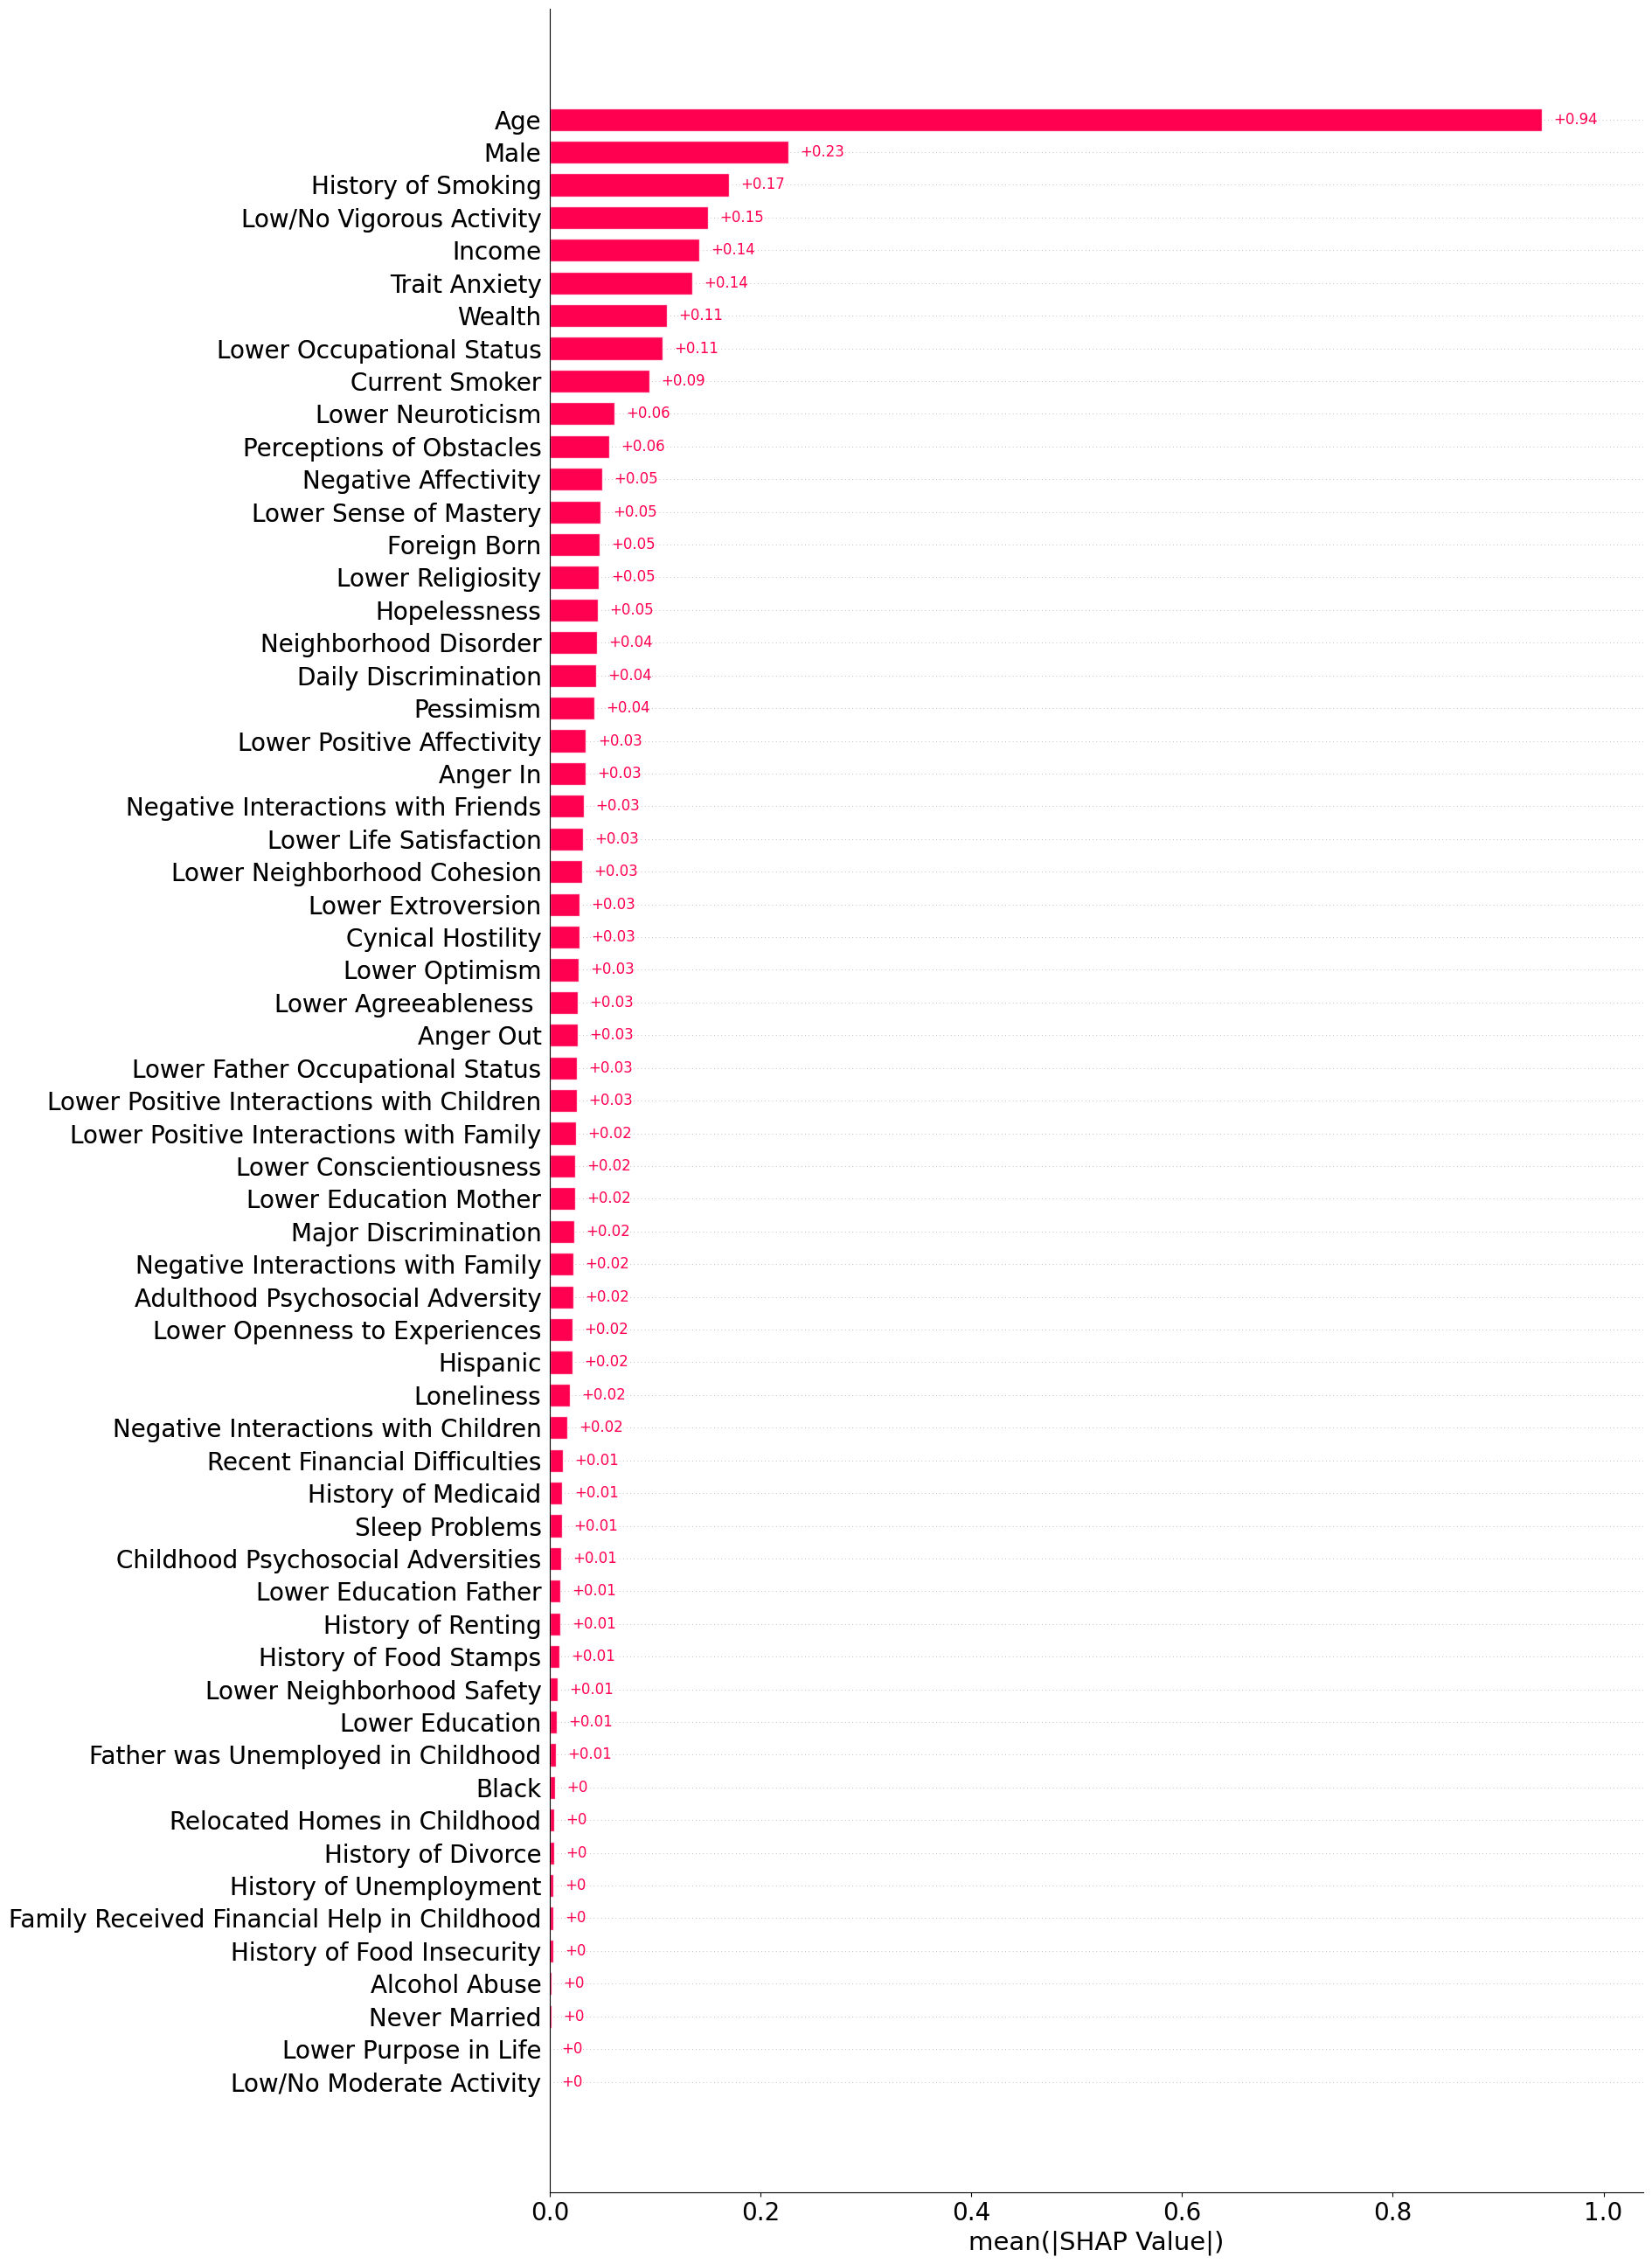

In [87]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,
                   var_dict=model_params['var_dict'],
                   max_display=shap_values_test.shape[1])


### top_10_scatter_plot

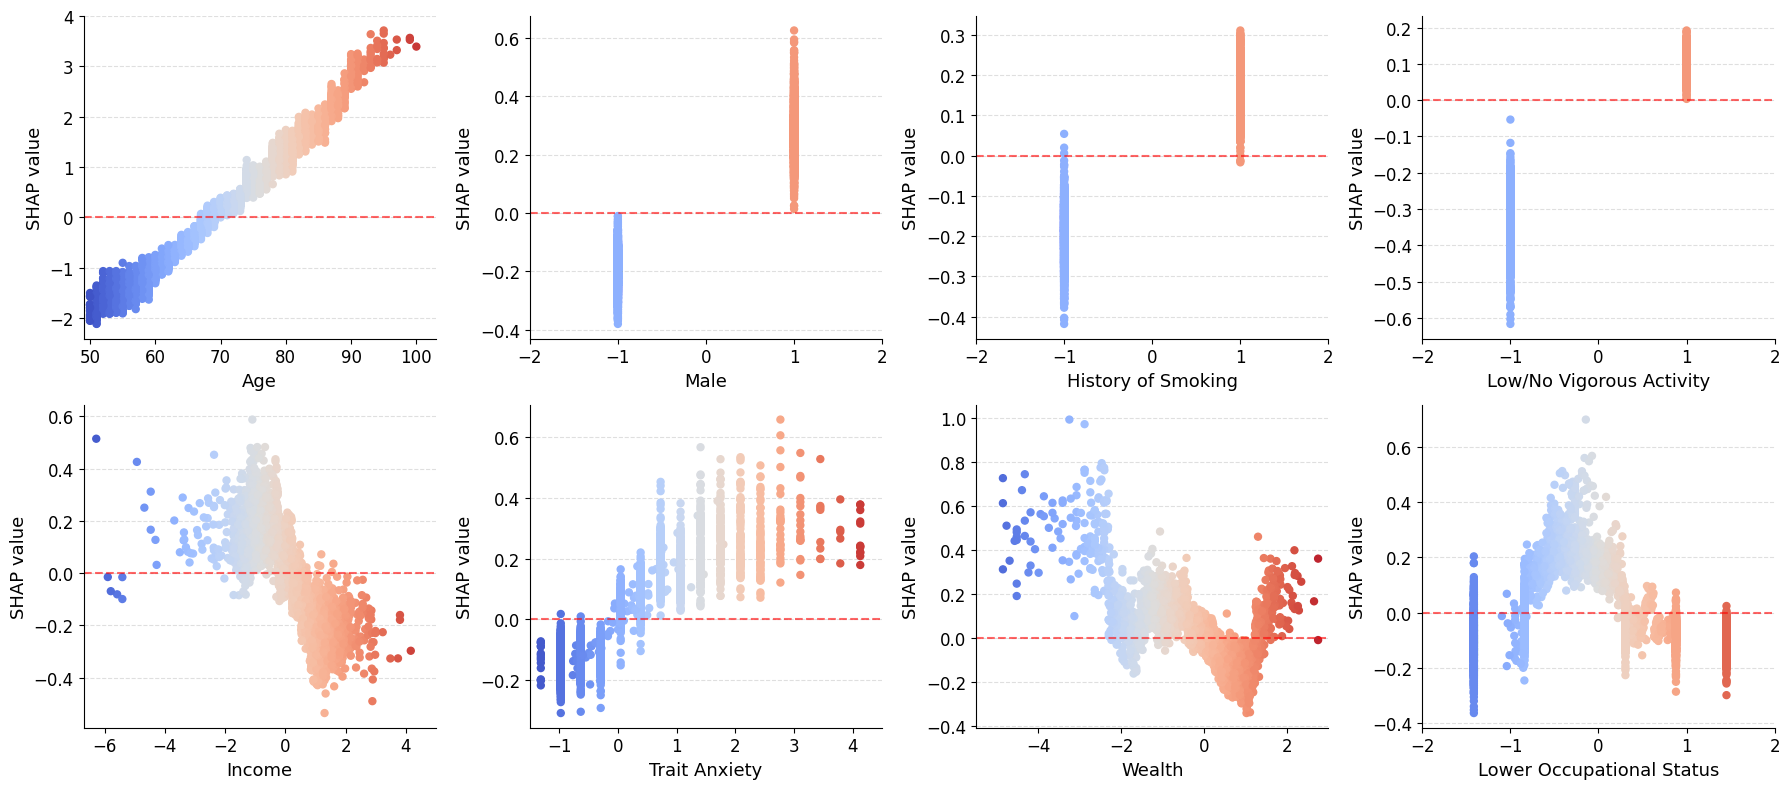

In [6]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## SHARE  

In [125]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'share_all'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb',
                                     train_subset_size=1, order=0)
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


In [126]:
dataset = 'SHARE'
temp = pd.DataFrame([x for x in Shap.shap_absolute_rank(shap_values_test) if x[1]>=0.1],
                    columns=['var',dataset])
df_shaps =pd.merge(left= df_shaps, right = temp, left_on='var',right_on='var',how='outer')
df_shaps

var       HRS     SHARE
0                     age  0.941220  0.939643
1                  maleYN  0.226142  0.242400
2             eversmokeYN  0.169687       NaN
3           vigactivityYN  0.149681       NaN
4                ZincomeT  0.141934       NaN
5                Zanxiety  0.135472       NaN
6                ZwealthT  0.111158  0.160642
7                    rocc  0.106647       NaN
8             currsmokeYN       NaN  0.197932
9            Zmotherseduc       NaN  0.107304
10  Zperceivedconstraints       NaN  0.100594

###   shap rank bar plot

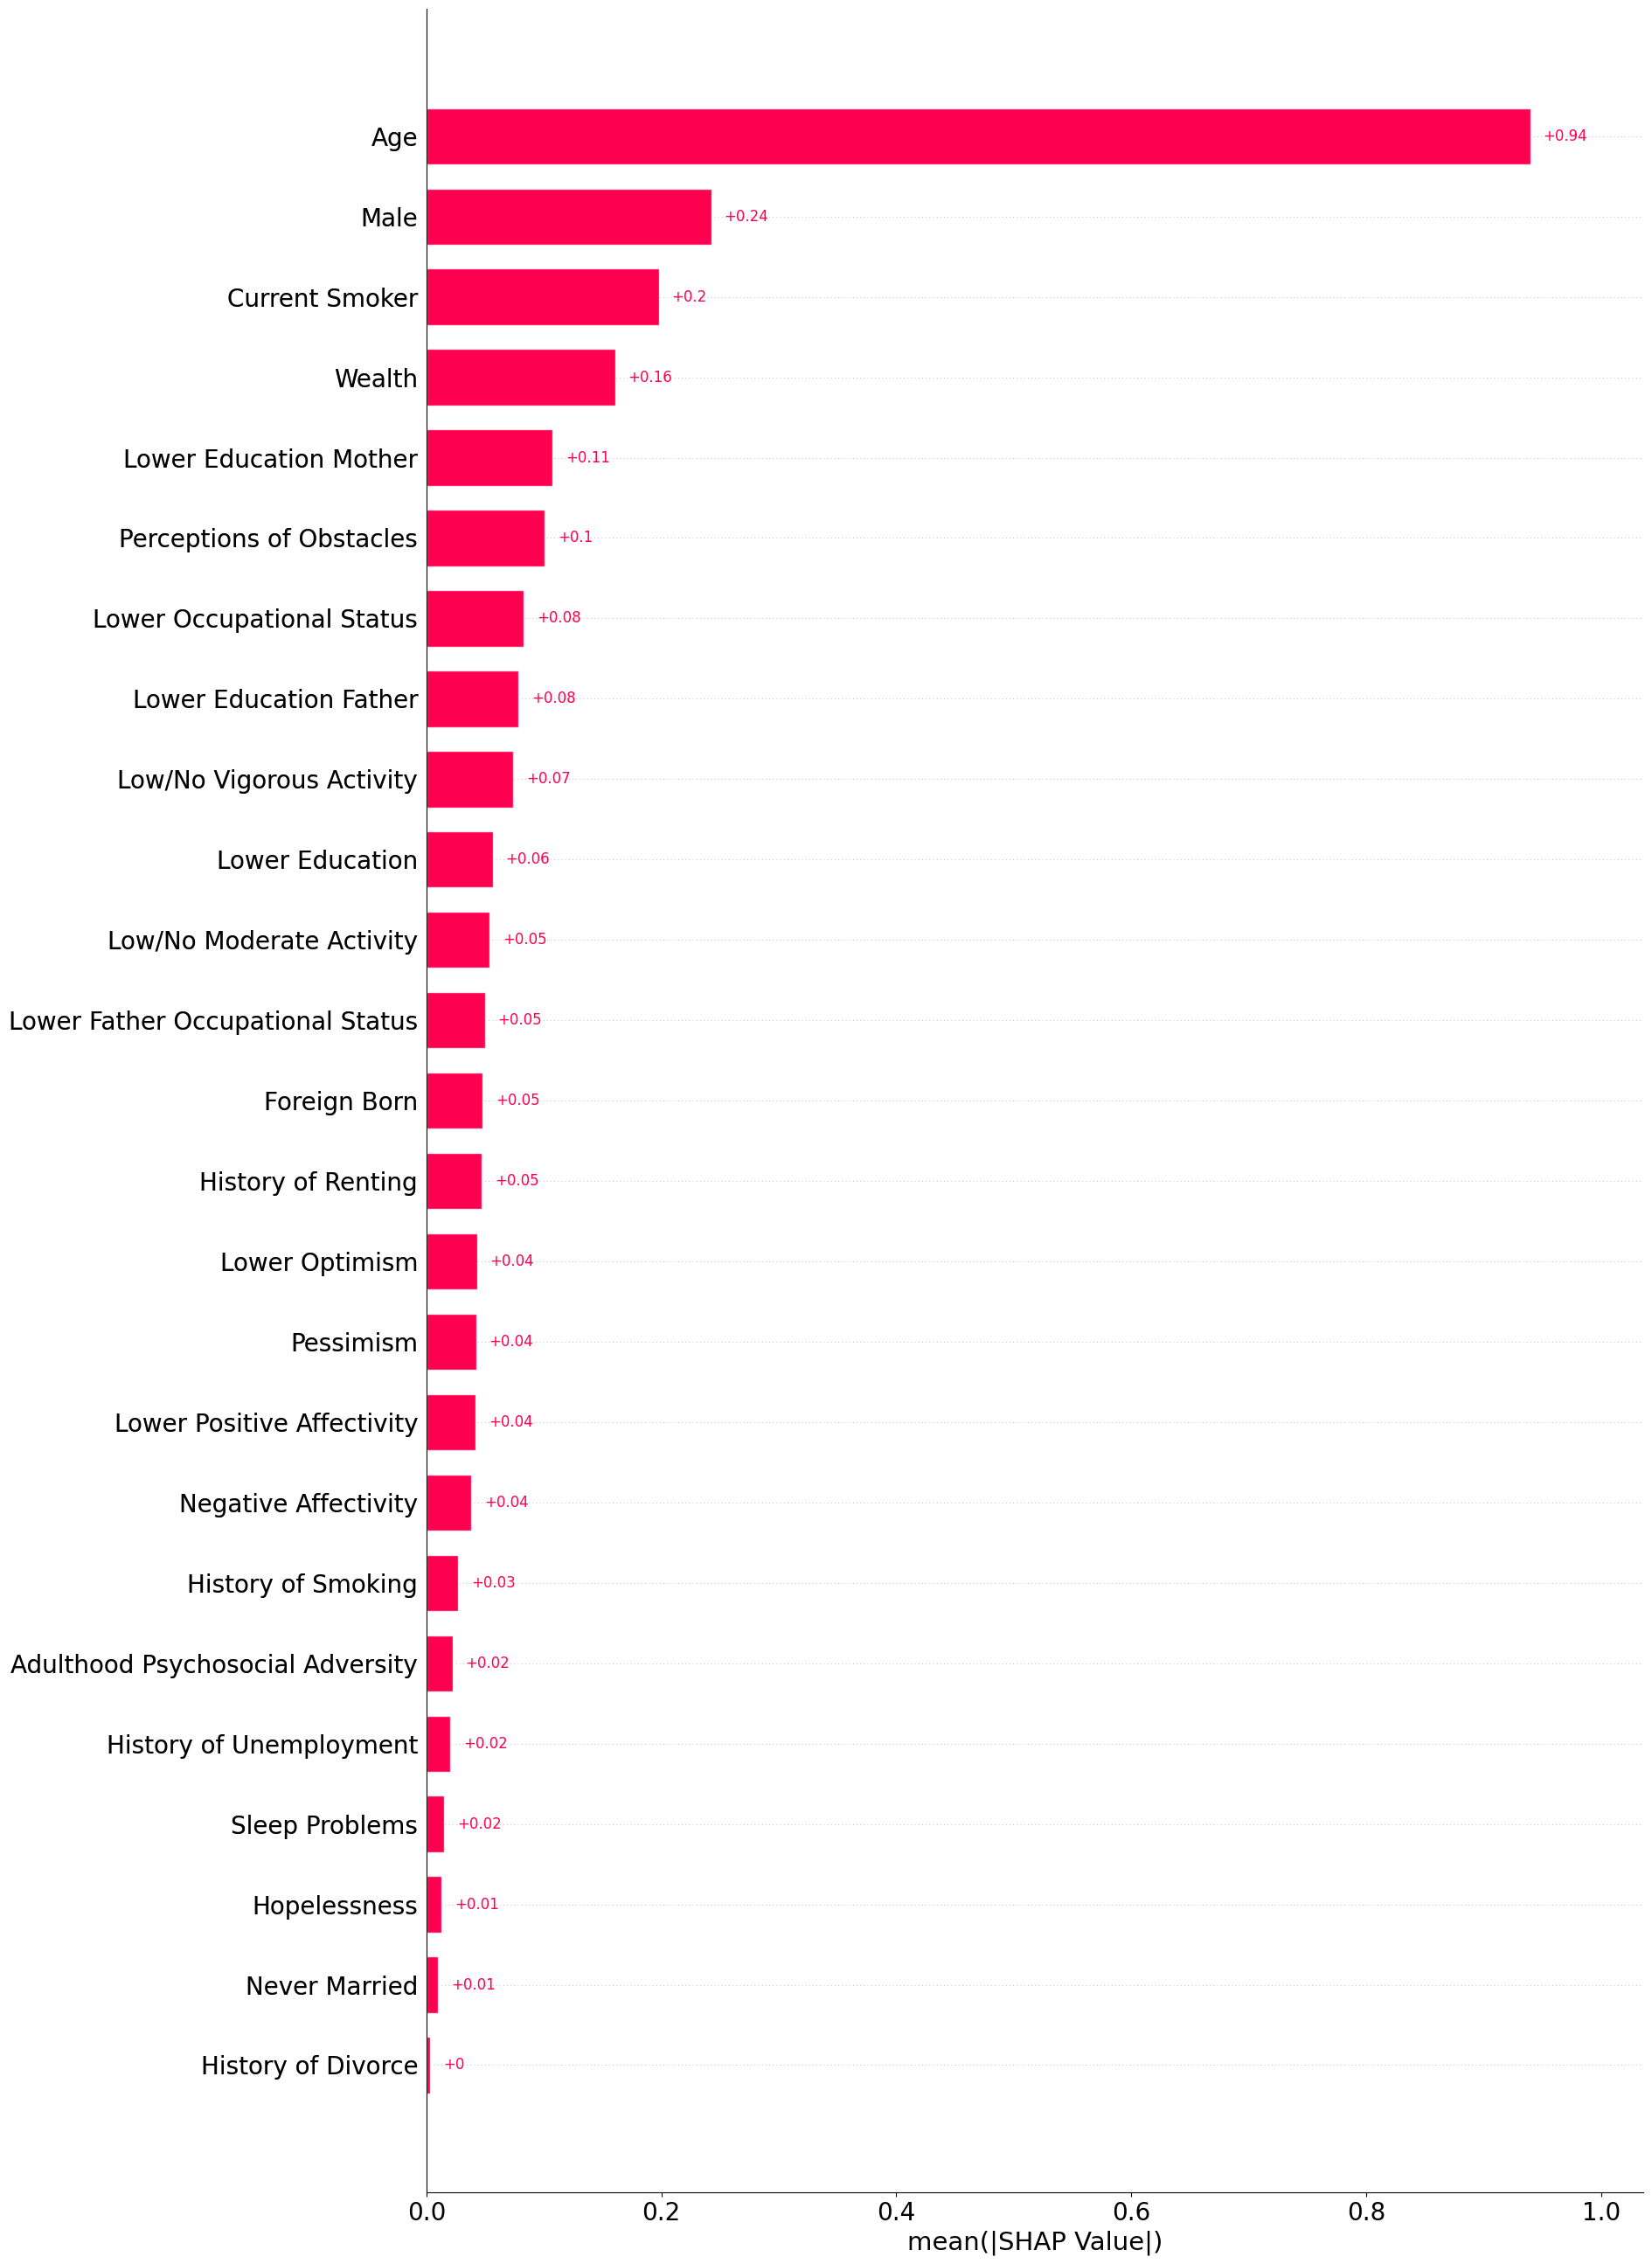

In [10]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,
                   var_dict=model_params['var_dict'],
                   max_display=shap_values_test.shape[1])


In [115]:

temp = pd.DataFrame([x for x in Shap.shap_absolute_rank(shap_values_test) if x[1]>=0.1],
                    columns=['var','hrs'])
df_shaps =pd.merge(left= df_shaps, right = temp, left_on='var',right_on='var',how='outer')
df_shaps

###  top 6 scatterplot

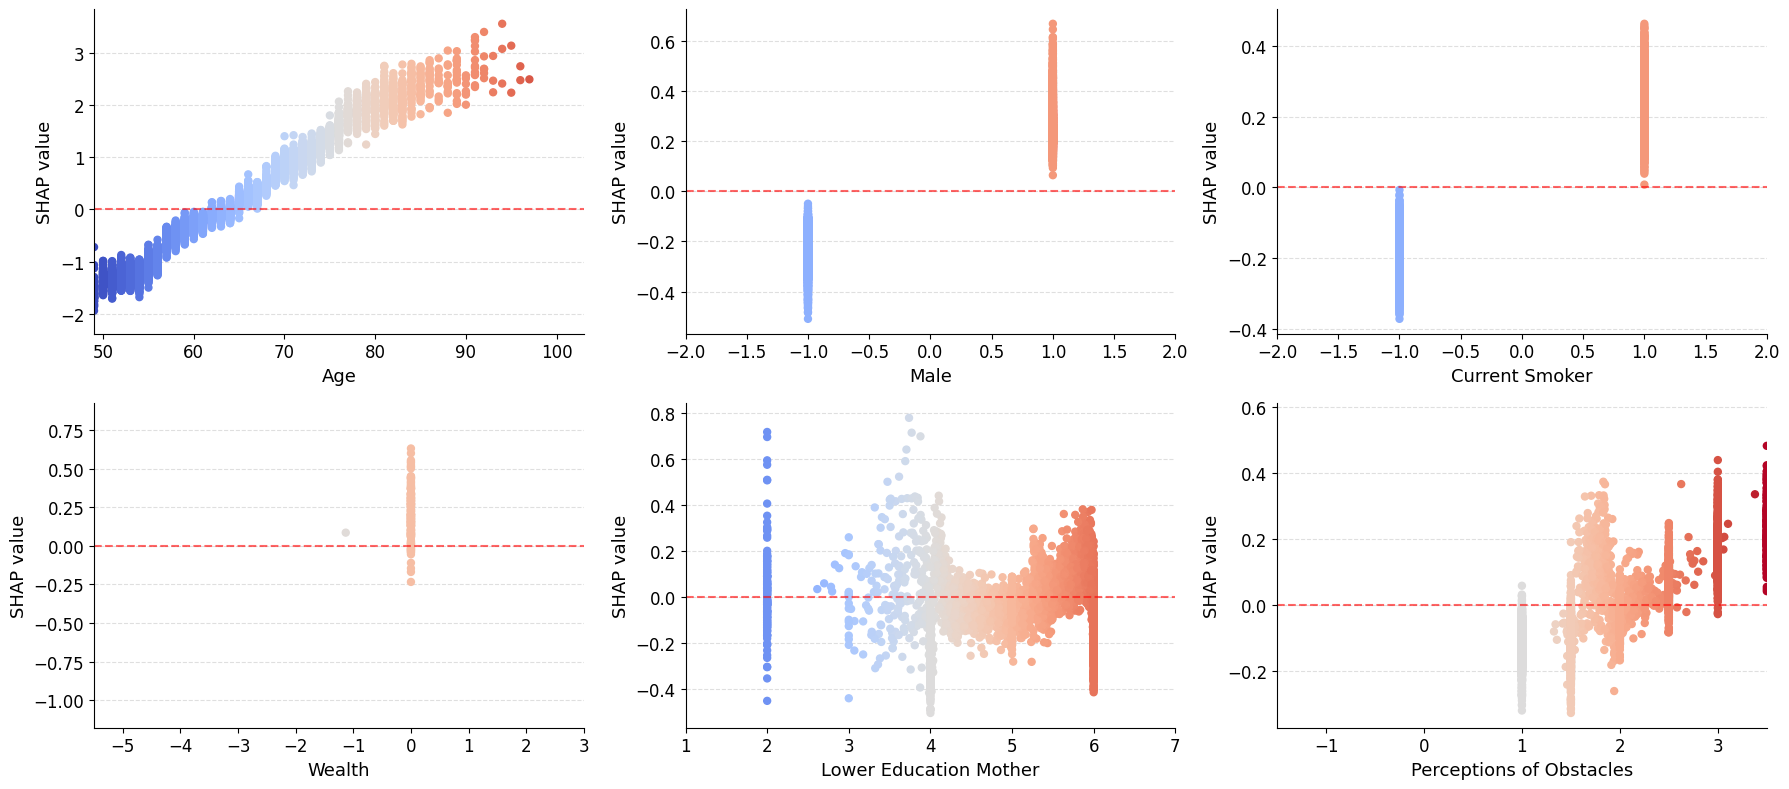

In [11]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## ELSA

In [12]:
df = params.data_reader(dataset='ELSA',source='us',bio=False)
domain_name = 'elsa_all'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb',
                                     train_subset_size=1, order=0)
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


for column in df.columns:
    print(column,df[column].value_counts())
    
    print(df[column].isna().sum())
    print()

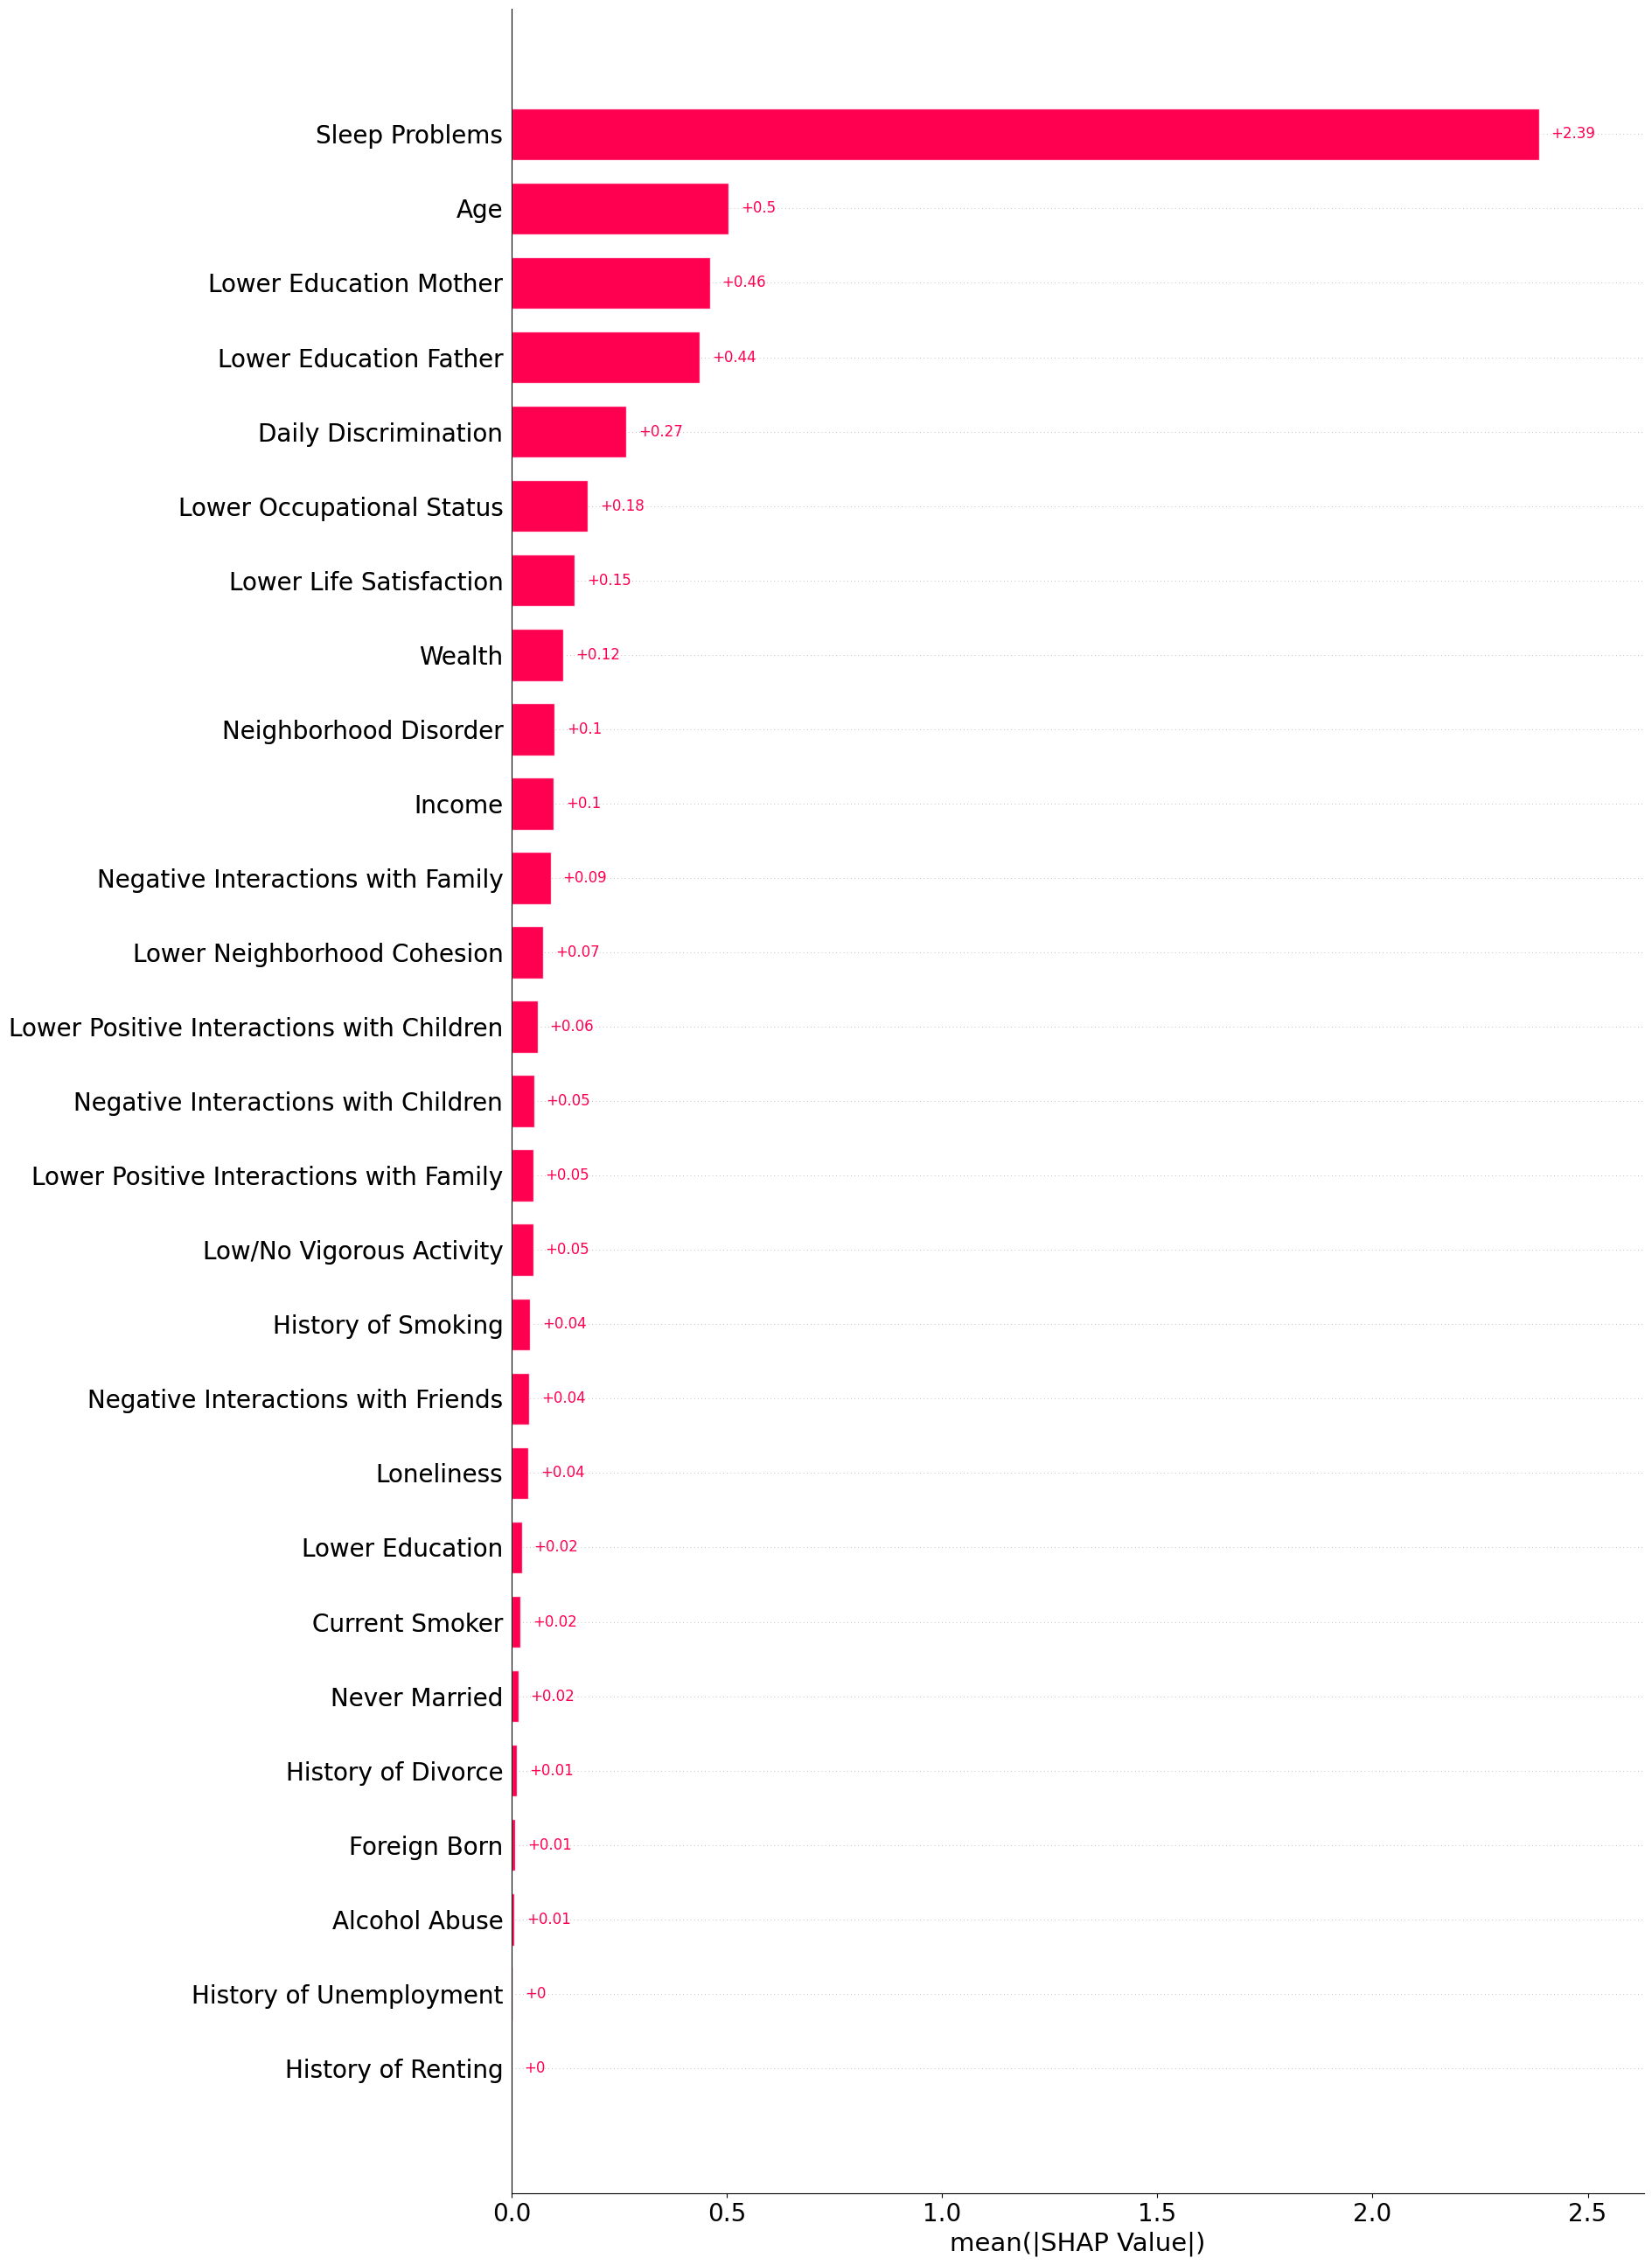

In [6]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,
                   var_dict=model_params['var_dict'],
                   max_display=shap_values_test.shape[1])


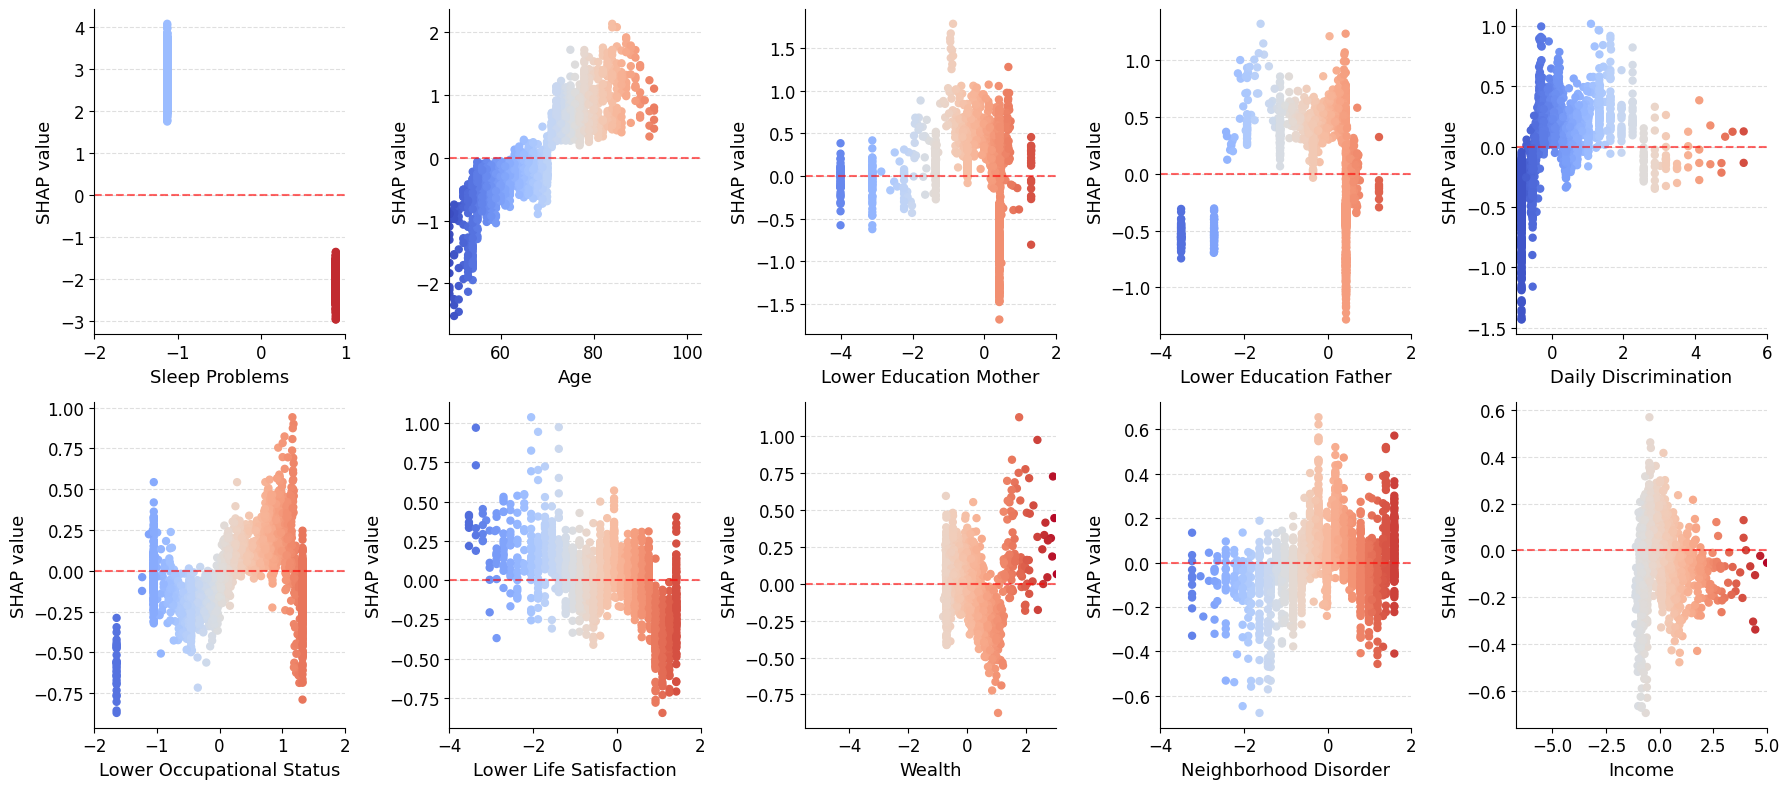

In [7]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## Combination 

In [127]:
domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
#model_params['domain_dict'][domain_name].remove('hhid')
#model_params['domain_dict'][domain_name].remove('pn')
model_params['var_dict']['dataset']='Datasource'
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb', train_subset_size=1, order=0)
shap_values_test,shap_dict = Shap.shap_values_and_dict(model)


In [128]:
dataset = 'COMB'
temp = pd.DataFrame([x for x in Shap.shap_absolute_rank(shap_values_test) if x[1]>=0.1],
                    columns=['var',dataset])
df_shaps =pd.merge(left= df_shaps, right = temp, left_on='var',right_on='var',how='outer')
df_shaps

var       HRS     SHARE      COMB
0                     age  0.941220  0.939643  0.953511
1                  maleYN  0.226142  0.242400  0.223903
2             eversmokeYN  0.169687       NaN       NaN
3           vigactivityYN  0.149681       NaN       NaN
4                ZincomeT  0.141934       NaN       NaN
5                Zanxiety  0.135472       NaN       NaN
6                ZwealthT  0.111158  0.160642       NaN
7                    rocc  0.106647       NaN       NaN
8             currsmokeYN       NaN  0.197932  0.137668
9            Zmotherseduc       NaN  0.107304       NaN
10  Zperceivedconstraints       NaN  0.100594       NaN

### shap rank bar plot 

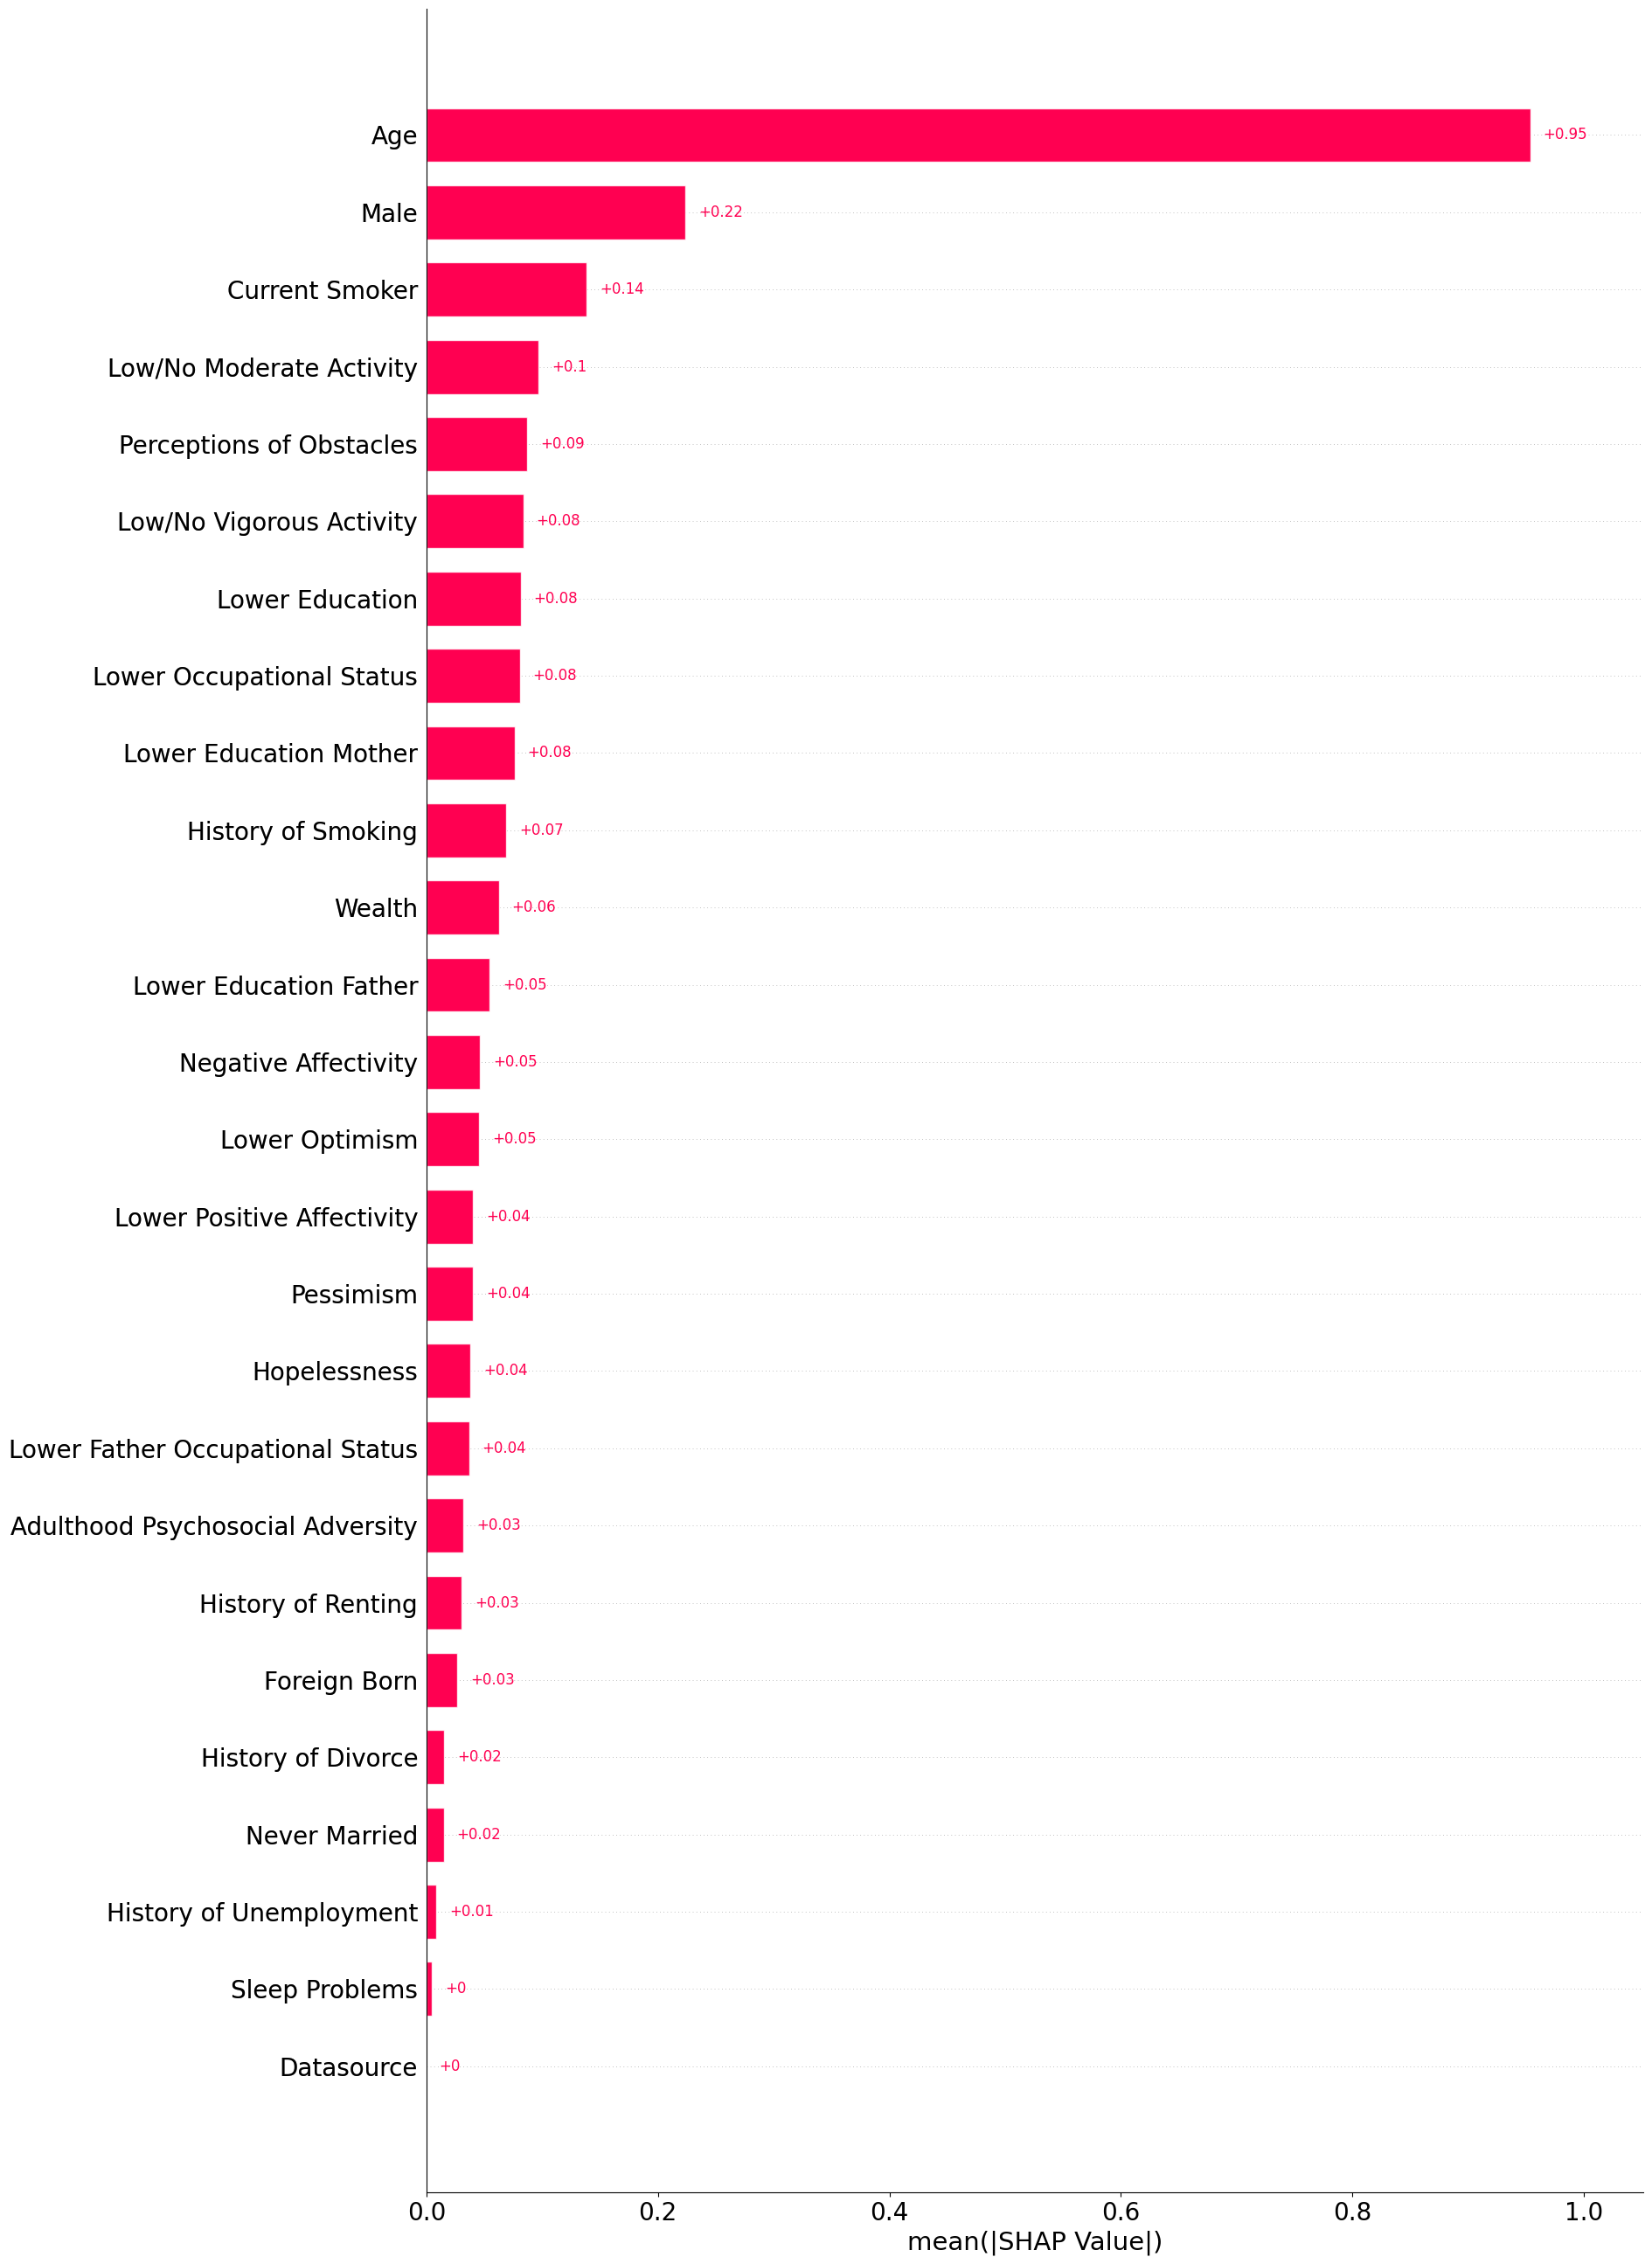

In [10]:
Shap.shap_rank_bar_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'], max_display=shap_values_test.shape[1])

### top scatter plot

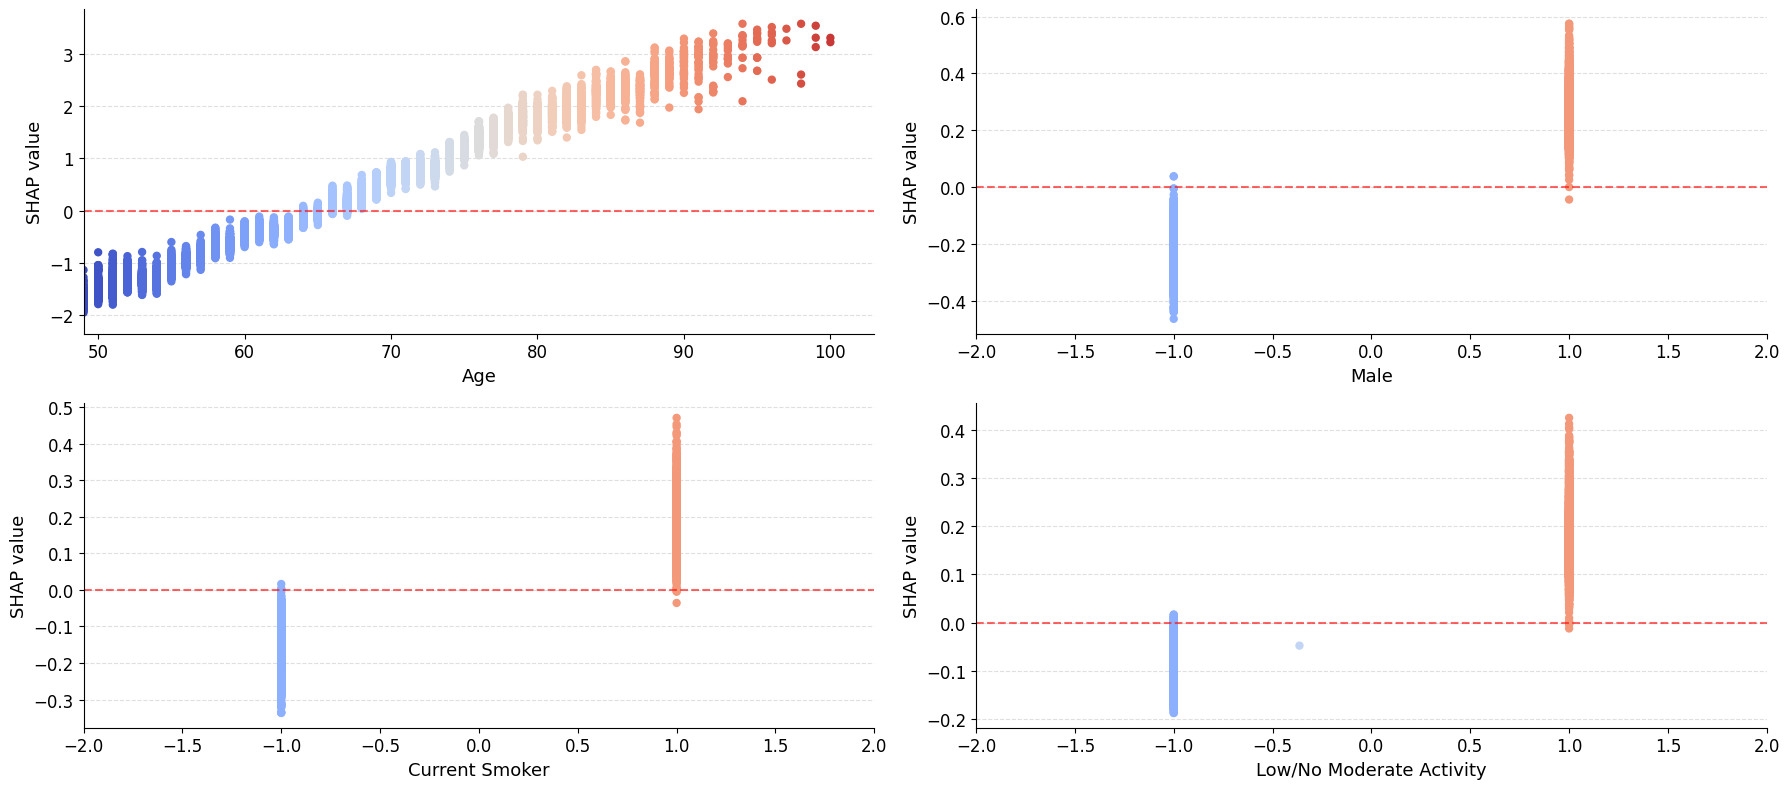

In [11]:
Shap.top_10_scatter_plot(shap_values_test=shap_values_test,var_dict=model_params['var_dict'])

## figure 1

In [217]:
df_shaps

var       HRS     SHARE      COMB
0                     age  0.941220  0.939643  0.953511
1                  maleYN  0.226142  0.242400  0.223903
2             eversmokeYN  0.169687       NaN       NaN
3           vigactivityYN  0.149681       NaN       NaN
4                ZincomeT  0.141934       NaN       NaN
5                Zanxiety  0.135472       NaN       NaN
6                ZwealthT  0.111158  0.160642       NaN
7                    rocc  0.106647       NaN       NaN
8             currsmokeYN       NaN  0.197932  0.137668
9            Zmotherseduc       NaN  0.107304       NaN
10  Zperceivedconstraints       NaN  0.100594       NaN

In [ ]:
shap_overall_rank_plot(df_shaps=df_shaps,save_control=False,var_dict=model_params['var_dict'])

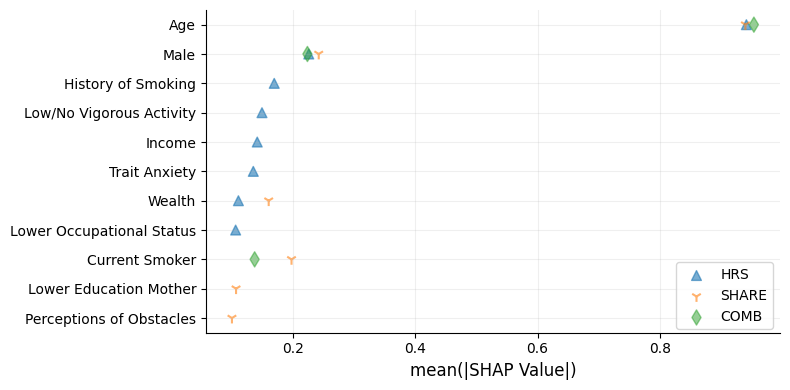

In [216]:
fontsize_ticks = 12
fontsize_labels = 12
var_dict = model_params['var_dict']
df_shaps.sort_values(by=['HRS'],ascending=[False],inplace=True)

fig,ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(8)
ax.scatter(df_shaps['HRS'], df_shaps['var'], label='HRS',alpha=0.6,marker='^',s=[50]*len(df_shaps['var']))
ax.scatter(df_shaps['SHARE'], df_shaps['var'], label='SHARE',alpha=0.6,marker='1',s=[60]*len(df_shaps['var']))
ax.scatter(df_shaps['COMB'], df_shaps['var'], label='COMB',alpha=0.5,marker='d',s=[60]*len(df_shaps['var']))
#for var in df_shaps['var']:
#    ax.axhline(var, alpha=0.2, color='black')
    
ax.grid(axis='both',alpha=0.2)
ylabels = [var_dict[y_tick.get_text()] for y_tick in ax.get_yticklabels()]
ax.set_yticklabels(ylabels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('mean(|SHAP Value|)', fontsize=fontsize_labels)

ax.legend(bbox_to_anchor=(1, 0.24))
plt.gca().invert_yaxis()
fig.tight_layout()

plt.savefig(Path.cwd() / f'graphs/shap_overall_ranks.pdf')

# SuperLearner 

In [29]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva
from src import Shap
from src import SuperLearner
import random 

#platform = "jupyter"
#params.confirm_cwd(platform)
model_params = params.model_params

# specification
model_params['k'] = 10
model_params['y_colname'] = 'death'

## HRS

In [ ]:
df = params.data_reader(dataset='HRS',source='us',bio=False)
domain = 'all'

df_eva_10_seeds = pd.DataFrame()

for i in range(1,9):
    seed = random.randint(a=1,b=1000000000000)
    model_params['seed']=seed 
    superlearner = SuperLearner.superlearner(data=df,
                            test_size=model_params['test_size'],
                            domain_list=model_params['domain_dict'][domain],
                            y_colname=model_params['y_colname'],
                            k=model_params['k'],
                            random_state=model_params['random_state'],
                            train_subset_size=1)
    df_eva=sl_eva(superlearner)
    df_eva['seed']=[seed]*len(df_eva)
    df_eva_10_seeds=pd.concat([df_eva,df_eva_10_seeds],axis=0)
df_eva_10_seeds  

In [ ]:
df_eva_10_seeds.to_csv(Path.cwd()/'results/sl_10seeds_HRS.csv',index=False)

## SHARE

In [ ]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'share'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))


df_eva_10_seeds = pd.DataFrame()

for i in range(1,9):
    seed = random.randint(a=1,b=1000000000000)
    model_params['seed']=seed 
    superlearner = SuperLearner.superlearner(data=df,
                            test_size=model_params['test_size'],
                            domain_list=model_params['domain_dict'][domain],
                            y_colname=model_params['y_colname'],
                            k=model_params['k'],
                            random_state=model_params['random_state'],
                            train_subset_size=1)
    df_eva=sl_eva(superlearner)
    df_eva['seed']=[seed]*len(df_eva)
    df_eva_10_seeds=pd.concat([df_eva,df_eva_10_seeds],axis=0)
df_eva_10_seeds  

In [ ]:
df_eva_10_seeds.to_csv(Path.cwd()/'results/sl_10seeds_SHARE.csv',index=False)

In [ ]:
df_eva_10_seeds = pd.read_csv()

## ELSA

In [34]:
df = params.data_reader(dataset='ELSA',source='us',bio=False)

domain = 'ELSA'
model_params['domain_dict'][domain]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))

df_eva_10_seeds = pd.DataFrame()

for i in range(1,9):
    seed = random.randint(a=1,b=1000000000000)
    model_params['seed']=seed 
    superlearner = SuperLearner.superlearner(data=df,
                            test_size=model_params['test_size'],
                            domain_list=model_params['domain_dict'][domain],
                            y_colname=model_params['y_colname'],
                            k=model_params['k'],
                            random_state=model_params['random_state'],
                            train_subset_size=1)
    df_eva=sl_eva(superlearner)
    df_eva['seed']=[seed]*len(df_eva)
    df_eva_10_seeds=pd.concat([df_eva,df_eva_10_seeds],axis=0)
df_eva_10_seeds  

5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


5412 5412
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10


divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract
divide by zero encountered in log
divide by zero encountered in log
invalid value encountered in subtract


model    pr_auc   roc_auc        f1     efron       ffc        ip  \
0            XGB  0.261698  0.904377  0.180556  0.084001  0.213275  0.056911   
1            LGB  0.245781  0.908983  0.157143  0.080005  0.209844  0.056911   
2            SGD  0.267366  0.899634  0.207792 -0.163759  0.000482  0.056911   
3   DecisionTree  0.271828  0.615453  0.253165 -0.703907 -0.463435  0.056911   
4       AdaBoost  0.251872  0.911819  0.078740 -2.319116 -1.850690  0.056911   
..           ...       ...       ...       ...       ...       ...       ...   
8     KNeighbors  0.171022  0.745821  0.097902 -0.046604  0.101103  0.056911   
9        Bagging  0.252082  0.843902  0.108527  0.064487  0.196516  0.056911   
10  RandomForest  0.192637  0.815651  0.082645  0.038496  0.174192  0.056911   
11    ExtraTrees  0.157486  0.756136  0.034783 -0.005209  0.136656  0.056911   
12            sl  0.262051  0.904448  0.000000  0.094445  0.222246  0.056911   

         imv          seed  
0   0.011160  534430929791  
1   0.014890  534430929791  
2  -0.475172  534430929791  
3  -0.475172  534430929791  
4  -0.144483  534430929791  
..       ...           ...  
8  -0.475172  751979614223  
9  -0.475172  751979614223  
10 -0.475172  751979614223  
11 -0.475172  751979614223  
12  0.014548  751979614223  

[104 rows x 9 columns]

In [35]:
df_eva_10_seeds.to_csv(Path.cwd()/'results/sl_10seeds_ELSA.csv',index=False)

In [49]:
df_eva_10_seeds.loc[df_eva_10_seeds['model']=='sl']

model    pr_auc   roc_auc   f1     efron       ffc        ip       imv  \
12    sl  0.255106  0.905240  0.0  0.100181  0.227172  0.056911  0.015265   
12    sl  0.293335  0.914493  0.0  0.128802  0.251754  0.056911  0.017631   
12    sl  0.232898  0.909485  0.0  0.073796  0.204511  0.056911  0.016087   
12    sl  0.264542  0.906120  0.0  0.077065  0.207319  0.056911  0.015378   
12    sl  0.249832  0.907506  0.0  0.086886  0.215753  0.056911  0.015772   
12    sl  0.281738  0.910751  0.0  0.119629  0.243875  0.056911  0.016482   
12    sl  0.260341  0.906439  0.0  0.087358  0.216159  0.056911  0.015609   
12    sl  0.262051  0.904448  0.0  0.094445  0.222246  0.056911  0.014548   

            seed  
12  534430929791  
12  620591933638  
12  290908585527  
12  904000071647  
12   33667513122  
12  988952497827  
12  734976885092  
12  751979614223

## Table 1 

In [6]:
import warnings 
warnings.simplefilter("ignore") 


In [9]:
df_table_1 = pd.DataFrame()
for dataset in ['HRS','SHARE','ELSA','COMB']:
    df_eva_10_seeds = pd.read_csv(Path.cwd()/f'results/sl_10seeds_{dataset}.csv')
    for model in ['sl','LGB','LogisticRegression']:
        temp = pd.DataFrame(df_eva_10_seeds.loc[df_eva_10_seeds['model']==model].mean()).T
        temp.loc[len(temp)-1,['model','dataset']]=[model,dataset]
        df_table_1=pd.concat([df_table_1,temp],axis=0)

In [10]:
df_table_1

pr_auc   roc_auc        f1     efron       ffc        ip       imv  \
0  0.689172  0.821800  0.546779  0.287799  0.562399  0.293307  0.200180   
0  0.686606  0.824643  0.584854  0.289750  0.563598  0.293307  0.203837   
0  0.707362  0.831418  0.594595  0.306508  0.573895  0.293307  0.211114   
0  0.518734  0.795954  0.388488  0.209392  0.455144  0.202123  0.075431   
0  0.528390  0.803241  0.445736  0.217305  0.460598  0.202123  0.079958   
0  0.169923  0.447898  0.000000 -0.043870  0.280606  0.202123 -0.019554   
0  0.262480  0.908060  0.000000  0.096020  0.223599  0.056911  0.015847   
0  0.245781  0.908983  0.157143  0.080005  0.209844  0.056911  0.014890   
0  0.259335  0.894356  0.053571  0.132977  0.255340  0.056911  0.018068   
0  0.882793  0.946989  0.720973  0.611618  0.741331  0.224643  0.217043   
0  0.630034  0.840904  0.522448  0.292666  0.528905  0.224643  0.122198   
0  0.583321  0.814291  0.466968  0.246505  0.498161  0.224643  0.105188   

           seed               model dataset  
0  4.659557e+11                  sl     HRS  
0  4.659557e+11                 LGB     HRS  
0  4.659557e+11  LogisticRegression     HRS  
0  4.984037e+11                  sl   SHARE  
0  4.984037e+11                 LGB   SHARE  
0  4.984037e+11  LogisticRegression   SHARE  
0  6.074385e+11                  sl    ELSA  
0  6.074385e+11                 LGB    ELSA  
0  6.074385e+11  LogisticRegression    ELSA  
0  6.019244e+11                  sl    COMB  
0  6.019244e+11                 LGB    COMB  
0  6.019244e+11  LogisticRegression    COMB

In [17]:
df_table_1.loc[(df_table_1['dataset']==datasets[1])&(df_table_1['model']=='sl')]


Empty DataFrame
Columns: [pr_auc, roc_auc, f1, efron, ffc, ip, imv, seed, model, dataset]
Index: []

In [26]:
for datasets in [['HRS','SHARE'],['ELSA','COMB']]:
    print(datasets)
    for eva in ['imv','roc_auc','pr_auc','efron','ffc','ip']:
    
        print(" ")
        print("{}   & {:.3f} &  {:.3f} &  {:.3f} & {:.3f}&  {:.3f}&  {:.3f} \\\\".format(eva.upper().replace('_',' '),
                                                                           round(df_table_1.loc[(df_table_1['dataset']==datasets[0])&(df_table_1['model']=='sl'),eva].values[0],3),
                                                                           round(df_table_1.loc[(df_table_1['dataset']==datasets[0])&(df_table_1['model']=='LGB'),eva].values[0],3),
                                                                           round(df_table_1.loc[(df_table_1['dataset']==datasets[0])&(df_table_1['model']=='LogisticRegression'),eva].values[0],3),

                                                                           round(df_table_1.loc[(df_table_1['dataset']==datasets[1])&(df_table_1['model']=='sl'),eva].values[0],3),
                                                                           round(df_table_1.loc[(df_table_1['dataset']==datasets[1])&(df_table_1['model']=='LGB'),eva].values[0],3),
                                                                           round(df_table_1.loc[(df_table_1['dataset']==datasets[1])&(df_table_1['model']=='LogisticRegression'),eva].values[0],3)))
              
              
              
              
              

['HRS', 'SHARE']
 
IMV   & 0.200 &  0.204 &  0.211 & 0.075&  0.080&  -0.020 \\
 
ROC AUC   & 0.822 &  0.825 &  0.831 & 0.796&  0.803&  0.448 \\
 
PR AUC   & 0.689 &  0.687 &  0.707 & 0.519&  0.528&  0.170 \\
 
EFRON   & 0.288 &  0.290 &  0.307 & 0.209&  0.217&  -0.044 \\
 
FFC   & 0.562 &  0.564 &  0.574 & 0.455&  0.461&  0.281 \\
 
IP   & 0.293 &  0.293 &  0.293 & 0.202&  0.202&  0.202 \\
['ELSA', 'COMB']
 
IMV   & 0.016 &  0.015 &  0.018 & 0.217&  0.122&  0.105 \\
 
ROC AUC   & 0.908 &  0.909 &  0.894 & 0.947&  0.841&  0.814 \\
 
PR AUC   & 0.262 &  0.246 &  0.259 & 0.883&  0.630&  0.583 \\
 
EFRON   & 0.096 &  0.080 &  0.133 & 0.612&  0.293&  0.247 \\
 
FFC   & 0.224 &  0.210 &  0.255 & 0.741&  0.529&  0.498 \\
 
IP   & 0.057 &  0.057 &  0.057 & 0.225&  0.225&  0.225 \\


## combination

In [1]:

domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


cwd: /Users/valler/Python/OX_Thesis/OX_thesis


In [ ]:

df_eva_10_seeds = pd.DataFrame()
for i in range(1,9):
    seed = random.randint(a=1,b=1000000000000)
    model_params['seed']=seed 
    superlearner = SuperLearner.superlearner(data=df,
                            test_size=model_params['test_size'],
                            domain_list=model_params['domain_dict']['combination_all'],
                            y_colname=model_params['y_colname'],
                            k=model_params['k'],
                            random_state=model_params['random_state'],
                            train_subset_size=1)
    df_eva=sl_eva(superlearner)
    df_eva['seed']=[seed]*len(df_eva)
    df_eva_10_seeds=pd.concat([df_eva,df_eva_10_seeds],axis=0)
    

In [13]:
df_eva_10_seeds

model    pr_auc   roc_auc        f1     efron       ffc        ip  \
0            XGB  0.674514  0.863575  0.572674  0.342862  0.562336  0.224643   
1            LGB  0.630034  0.840904  0.522448  0.292666  0.528905  0.224643   
2            SGD  0.532138  0.768993  0.527175 -0.171521  0.219749  0.224643   
3   DecisionTree  0.739439  0.812944  0.707196  0.230866  0.487745  0.224643   
4       AdaBoost  0.581372  0.816307  0.480286 -0.381784  0.079710  0.224643   
..           ...       ...       ...       ...       ...       ...       ...   
8     KNeighbors  0.594081  0.812407  0.523251  0.226532  0.484858  0.224643   
9        Bagging  0.810744  0.913088  0.715294  0.502274  0.668506  0.224643   
10  RandomForest  0.800814  0.910525  0.699271  0.487248  0.658499  0.224643   
11    ExtraTrees  0.845327  0.923936  0.739791  0.548662  0.699401  0.224643   
12            sl  0.884445  0.948398  0.740985  0.615104  0.743653  0.224643   

         imv          seed  
0   0.139033  581958458618  
1   0.122198  581958458618  
2  -0.352873  581958458618  
3  -0.352873  581958458618  
4  -0.242582  581958458618  
..       ...           ...  
8  -0.352873  206243973551  
9  -0.352873  206243973551  
10 -0.352873  206243973551  
11 -0.352873  206243973551  
12  0.218027  206243973551  

[104 rows x 9 columns]

In [12]:
df_eva_10_seeds.to_csv(Path.cwd()/'results/sl_10seeds.csv',index=False)

In [15]:
for seed in df_eva_10_seeds['seed'].unique():
    df_eva_10_seeds.loc[(df_eva_10_seeds['seed']==seed)]

# Domain Contribution

In [158]:
from src.Domains_Diff_in_combination import get_dc_params,dc_iteration,dd_post_process,dc_plot
model_params = params.model_params

## HRS

In [185]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'HRS'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))

basic_domains = ['demographic', 'child_adverse', 'adult_SES', 'behavioral', 'adult_adverse', 'social_connection', 'psych']

domains = []
for var in model_params['domain_dict'][domain_name]:
    for domain in basic_domains:
        if var in model_params['domain_dict'][domain]:
            domains+=[domain]
domains = list(set(domains))



In [187]:
domain_name_lst,df_eval,iterations = get_dc_params(domains)
domains = model_params['domain_dict']
test_size = model_params['test_size']

pr_f1_contribution
pr_auc_contribution
roc_auc_contribution
imv_contribution


FixedFormatter should only be used together with FixedLocator


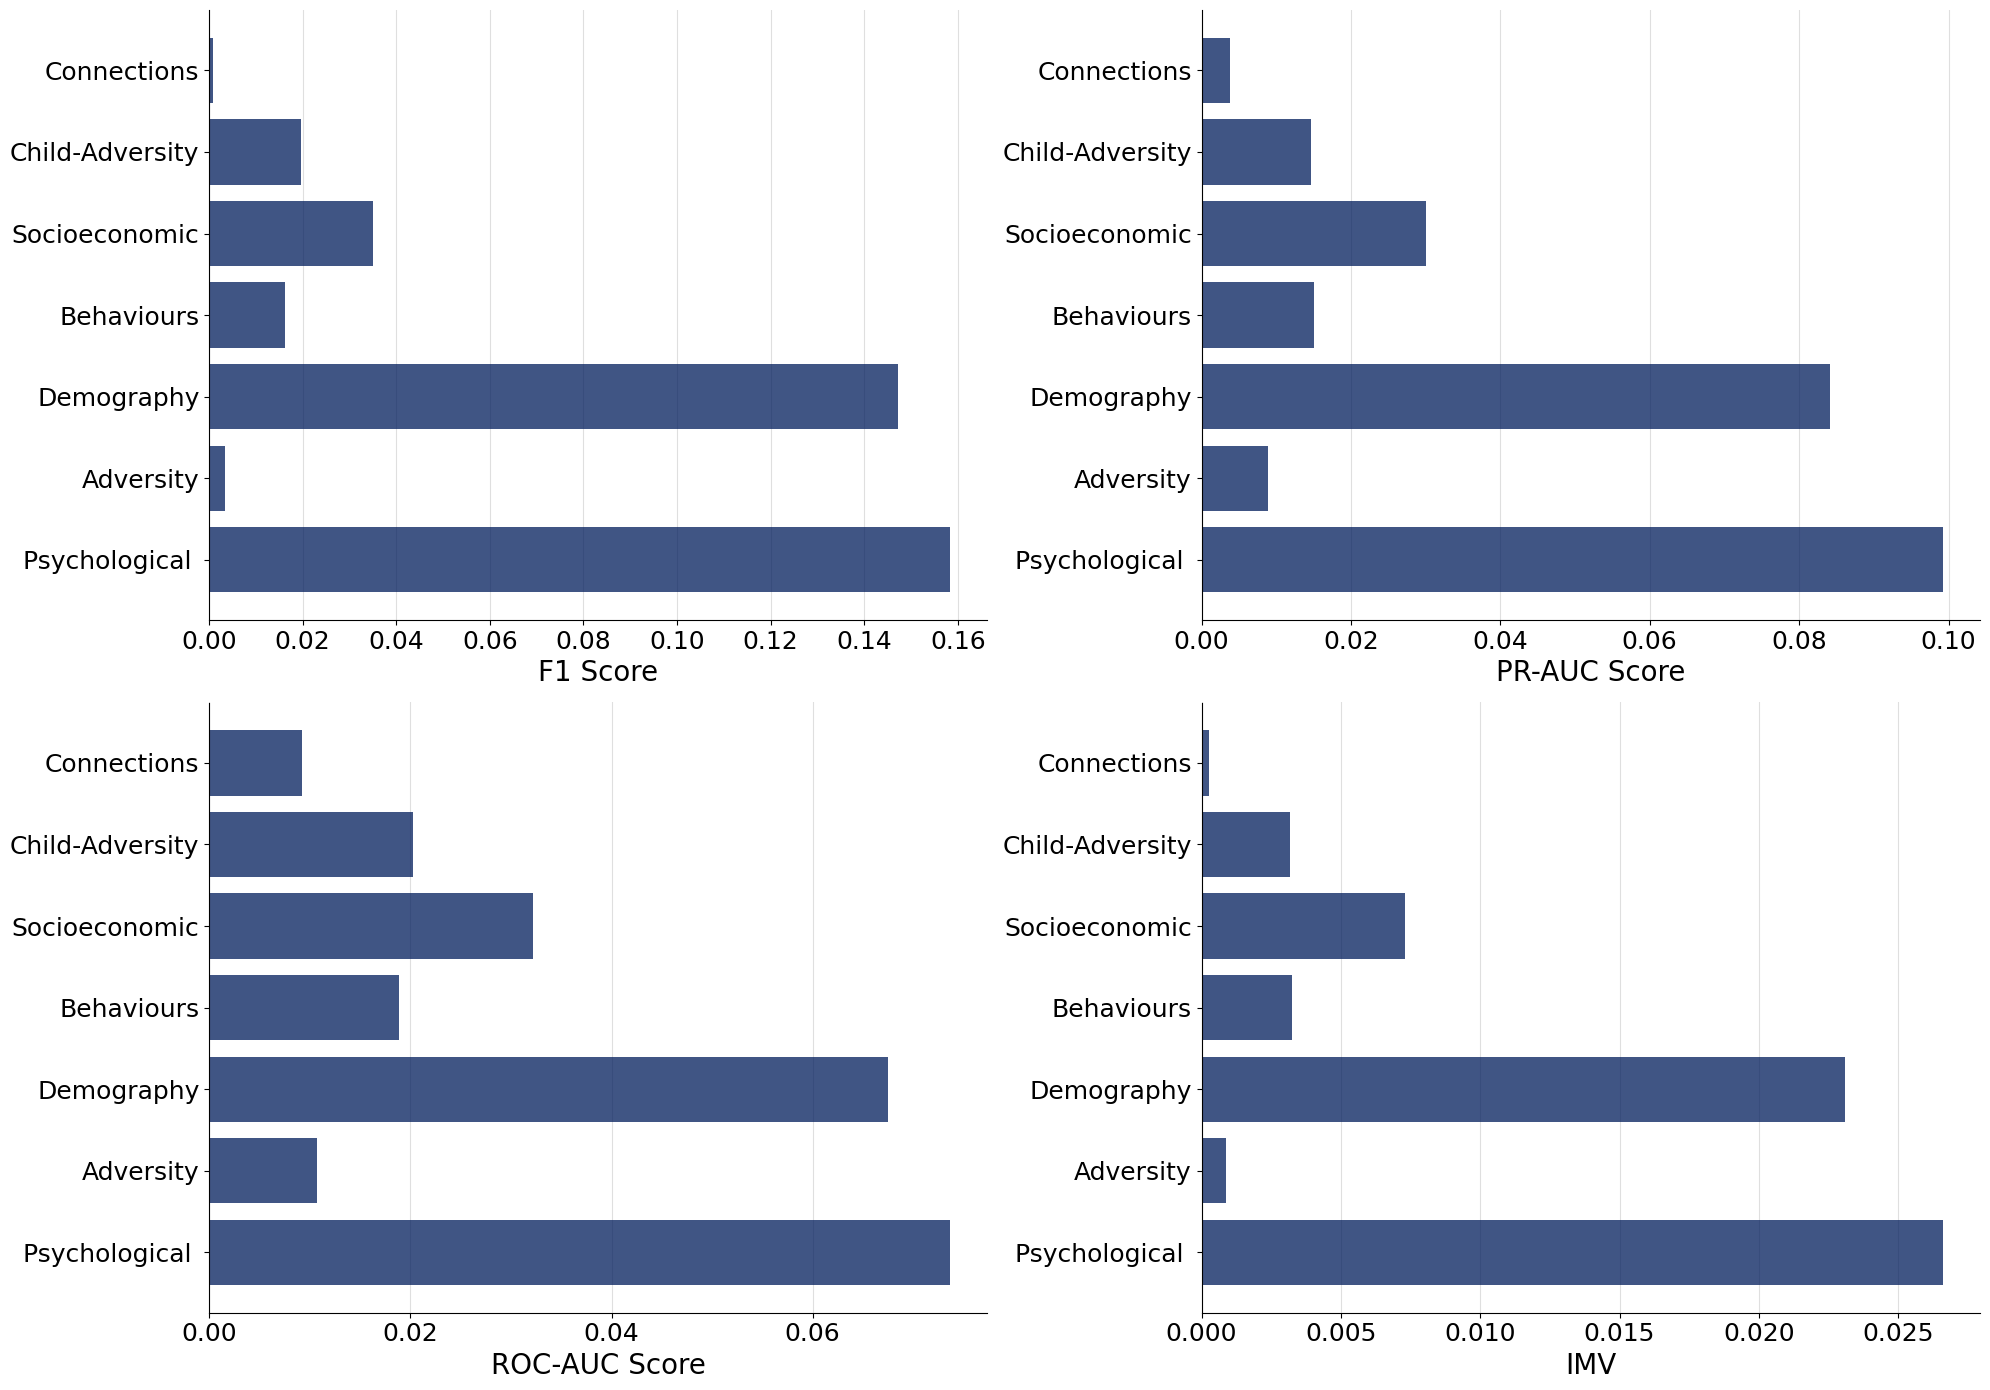

In [192]:
df_eval = dc_iteration(iterations,df_eval,df,model_params)
model_eval_diff_hrs,contribution_hrs = dd_post_process(domain_name_lst,iterations,df_eval)
dc_plot(contribution_hrs,save_control=False)

## SHARE


In [3]:
df = params.data_reader(dataset='SHARE',source='us',bio=False)
domain_name = 'share'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))

basic_domains = ['demographic', 'child_adverse', 'adult_SES', 'behavioral', 'adult_adverse', 'social_connection', 'psych']

domains = []
for var in model_params['domain_dict']['share']:
    for domain in basic_domains:
        if var in model_params['domain_dict'][domain]:
            domains+=[domain]
domains = list(set(domains))



In [7]:
domain_name_lst,df_eval,iterations = get_dc_params(domains)
domains = model_params['domain_dict']
test_size = model_params['test_size']

df_eval = dc_iteration(iterations,df_eval,df,model_params)
model_eval_diff_share,contribution_share = dd_post_process(domain_name_lst,iterations,df_eval)
dc_plot(contribution_share,save_control=False)

pr_f1_contribution
pr_auc_contribution
roc_auc_contribution
imv_contribution


FixedFormatter should only be used together with FixedLocator


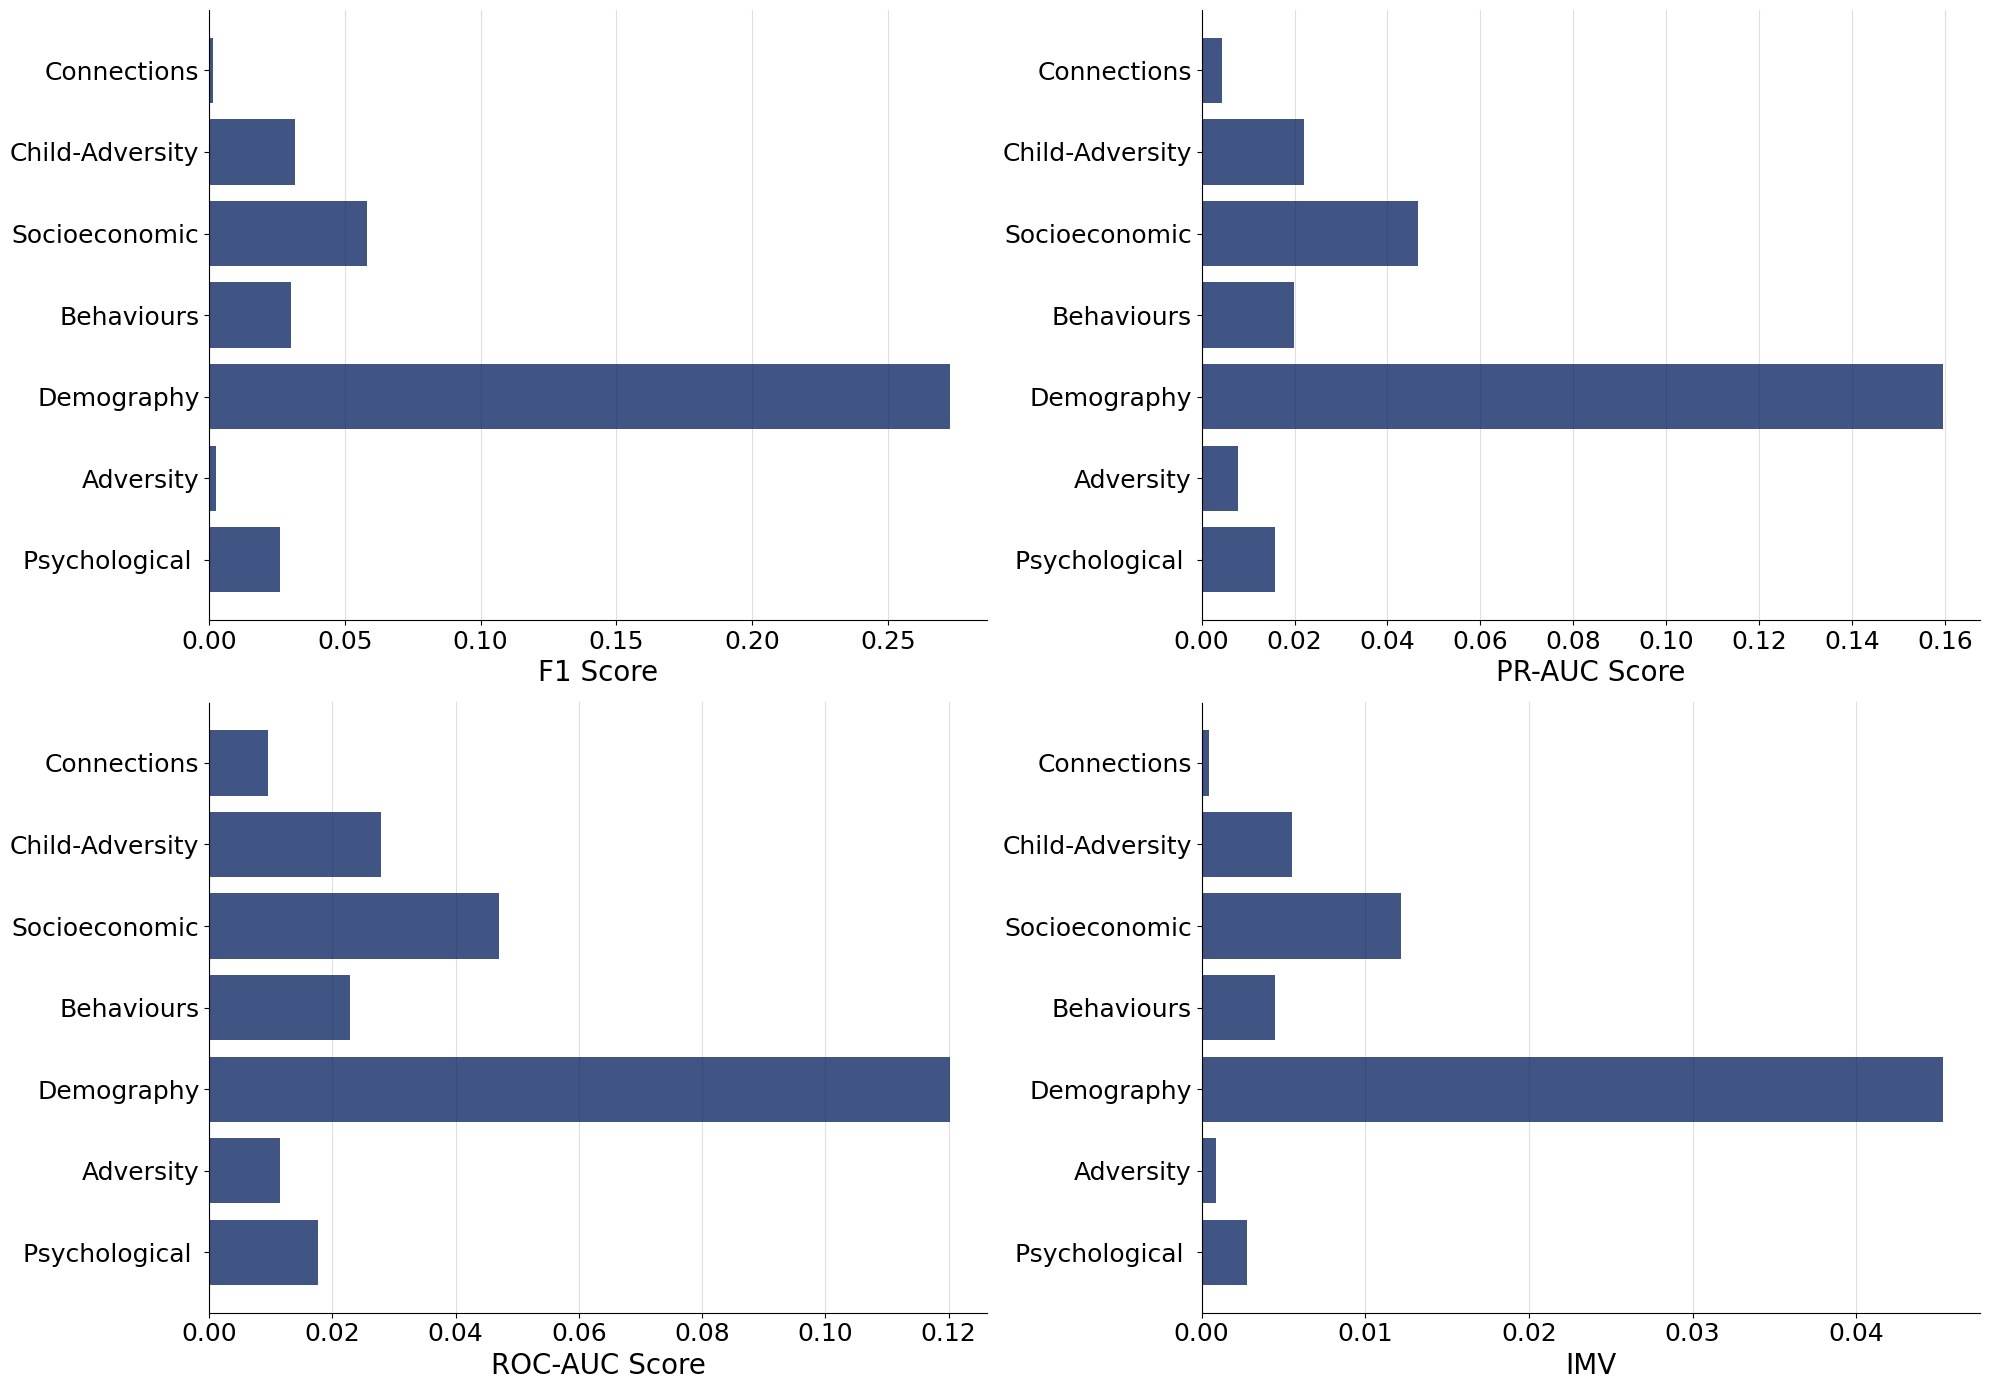

In [9]:
dc_plot(contribution_share,save_control=False)

## ELSA

In [23]:
df = params.data_reader(dataset='ELSA',source='us',bio=False)

domain_name = 'ELSA'
model_params['domain_dict'][domain_name]= list(set(model_params['domain_dict']['all']).intersection(set(df.columns)))


In [24]:
basic_domains = ['demographic', 'child_adverse', 'adult_SES', 'behavioral', 'adult_adverse', 'social_connection', 'psych']

domains = []
for var in model_params['domain_dict'][domain_name]:
    for domain in basic_domains:
        if var in model_params['domain_dict'][domain]:
            print()
            domains+=[domain]
domains = list(set(domains))


In [19]:
domain_name_lst,df_eval,iterations = get_dc_params(domains)
domains = model_params['domain_dict']
test_size = model_params['test_size']

pr_f1_contribution
pr_auc_contribution
roc_auc_contribution
imv_contribution


FixedFormatter should only be used together with FixedLocator


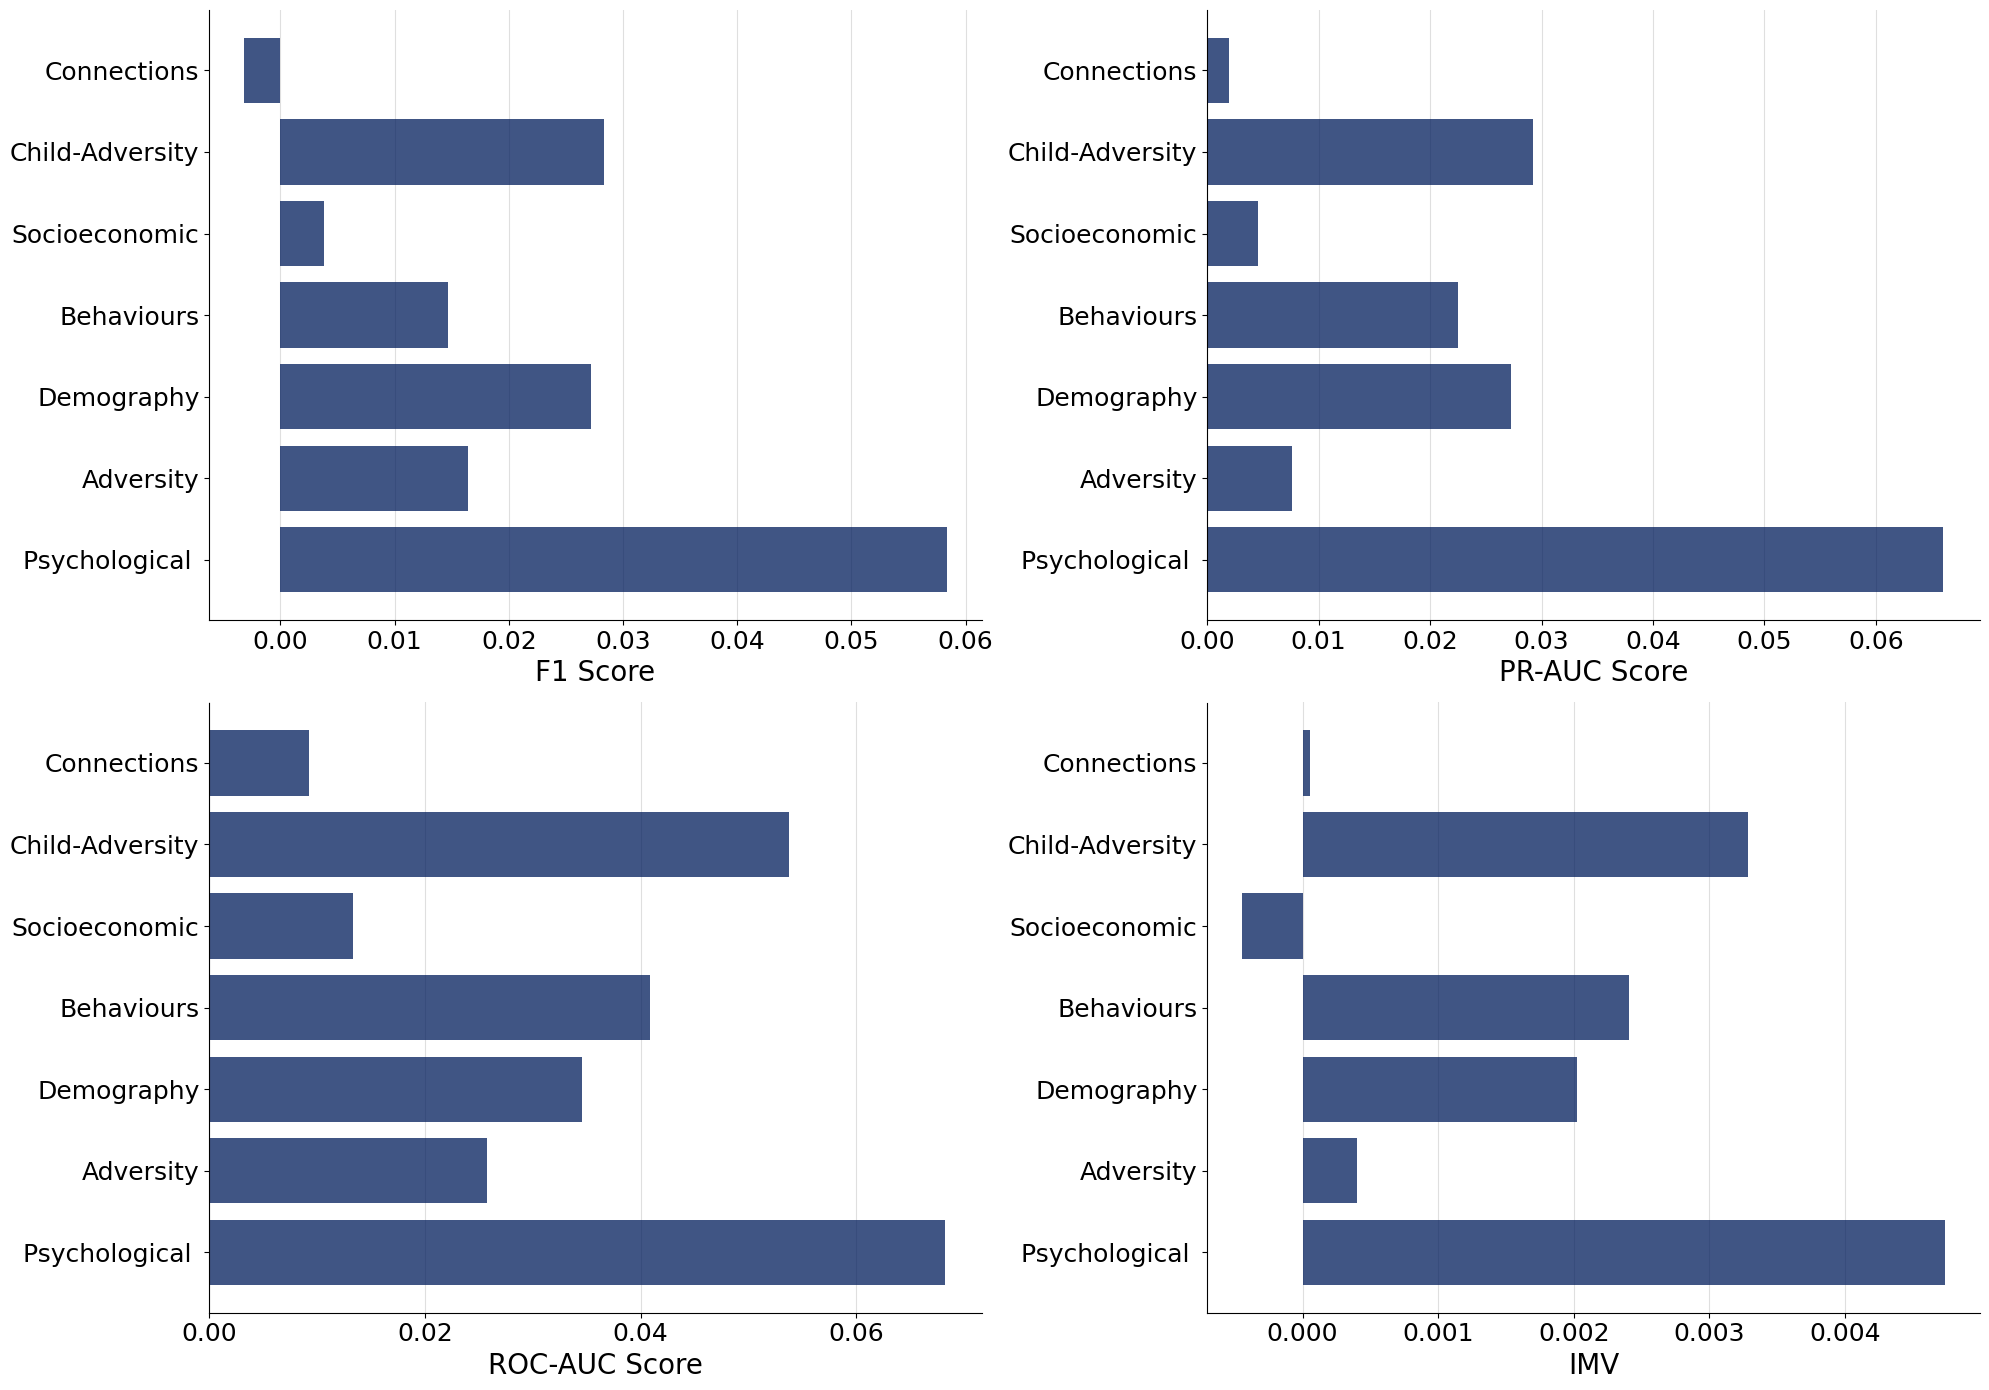

In [20]:
df_eval = dc_iteration(iterations,df_eval,df,model_params)
model_eval_diff_elsa,contribution_elsa = dd_post_process(domain_name_lst,iterations,df_eval)
dc_plot(contribution_elsa,save_control=False)

## Combination

In [10]:

domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


In [11]:
basic_domains = ['demographic', 'child_adverse', 'adult_SES', 'behavioral', 'adult_adverse', 'social_connection', 'psych']

domains = []
for var in model_params['domain_dict'][domain_name]:
    for domain in basic_domains:
        if var in model_params['domain_dict'][domain]:
            domains+=[domain]
domains = list(set(domains))


In [13]:
domain_name_lst,df_eval,iterations = get_dc_params(domains)
domains = model_params['domain_dict']
test_size = model_params['test_size']

pr_f1_contribution
pr_auc_contribution
roc_auc_contribution
imv_contribution


FixedFormatter should only be used together with FixedLocator


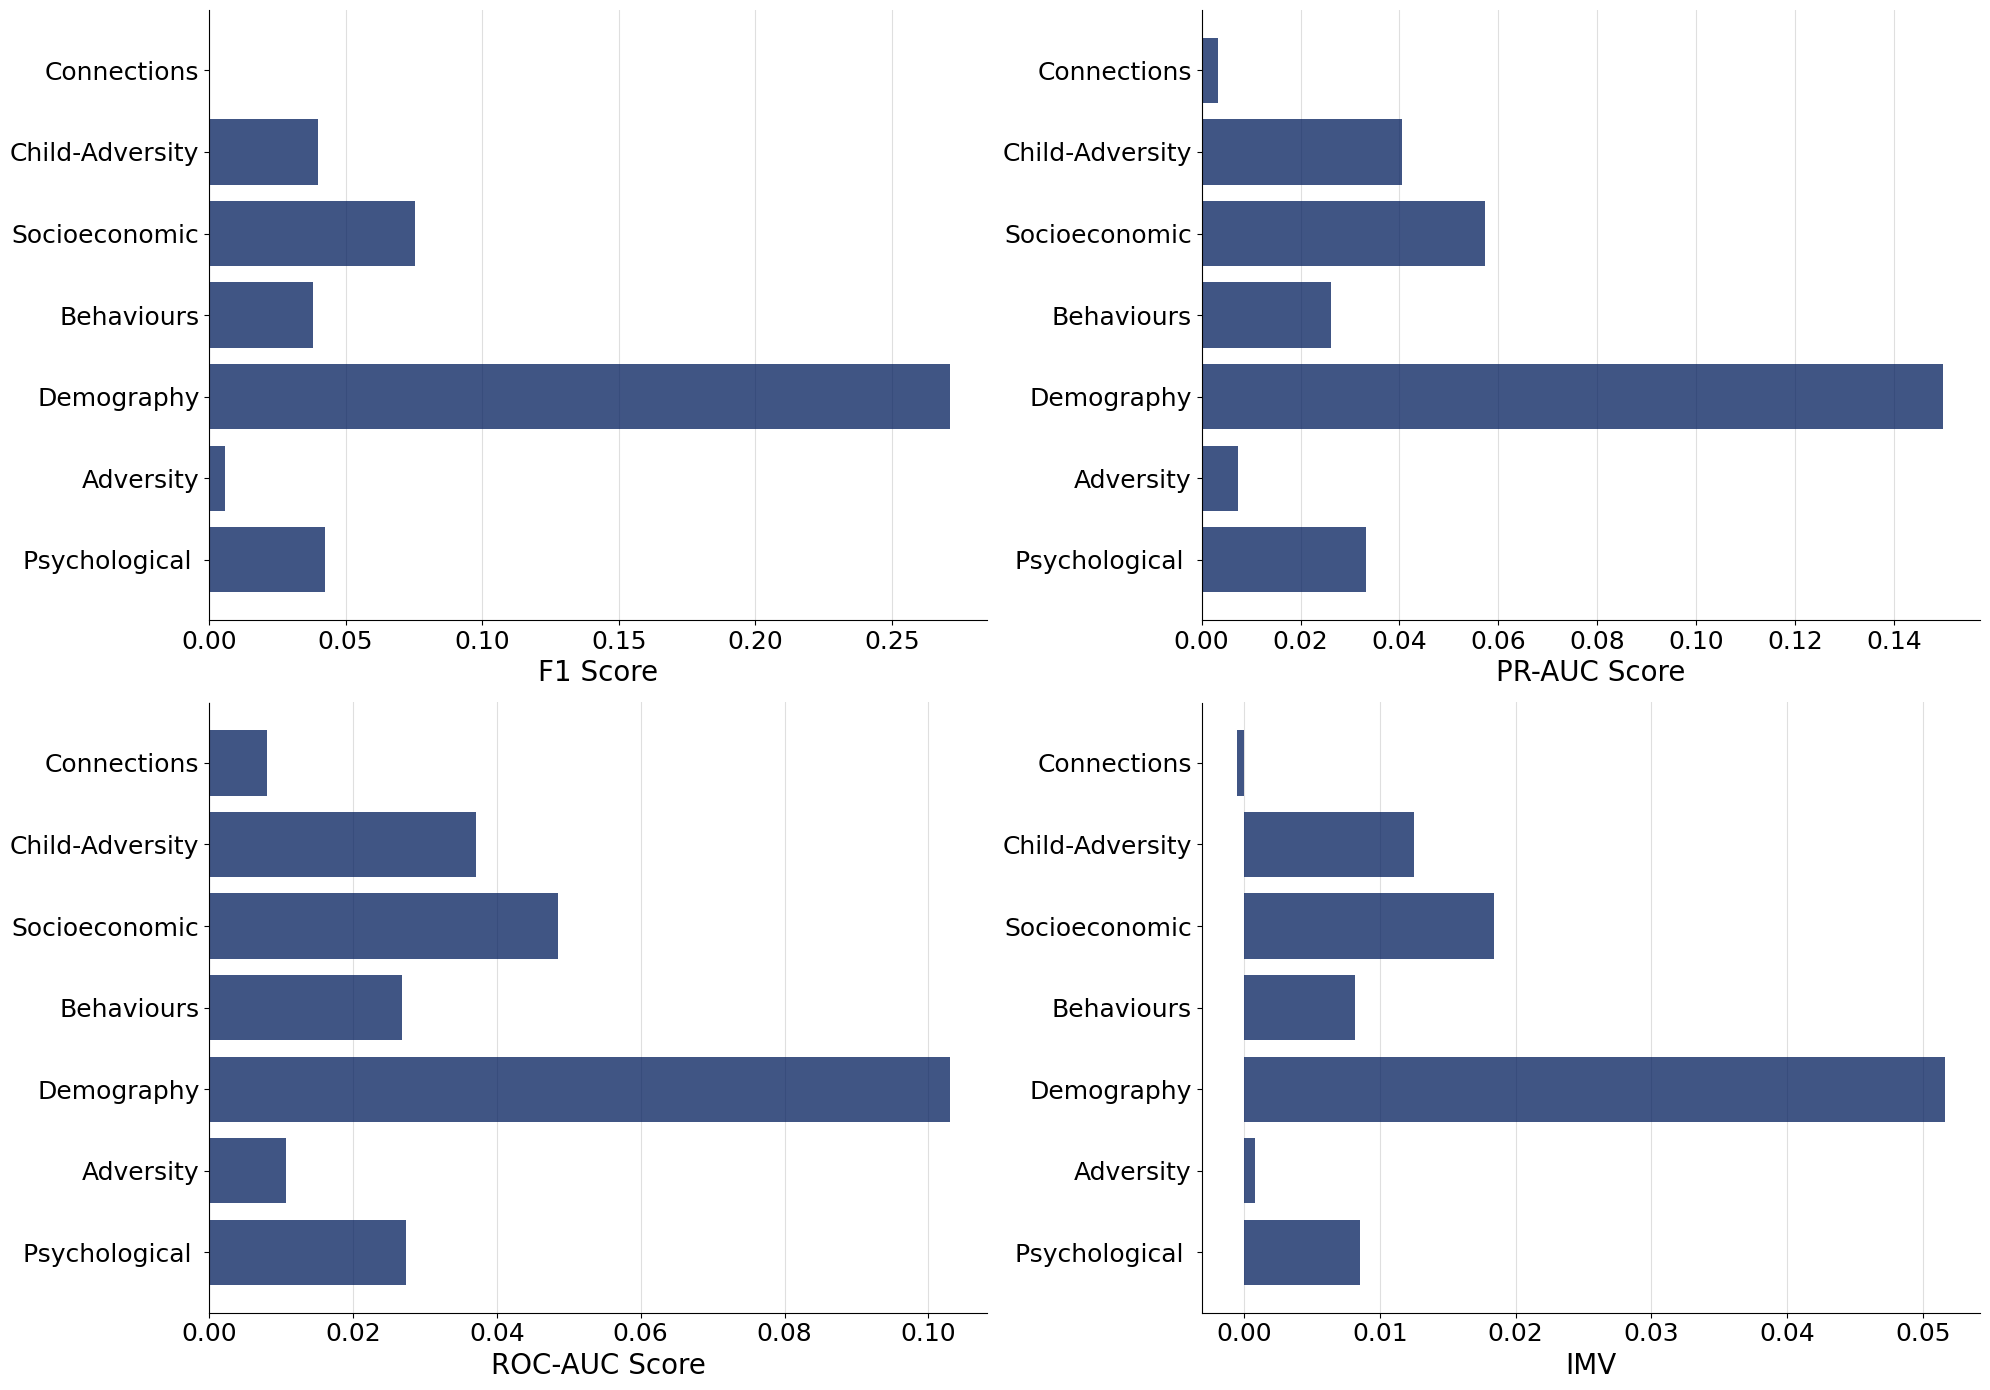

In [14]:
df_eval = dc_iteration(iterations,df_eval,df,model_params)
model_eval_diff_comb,contribution_comb = dd_post_process(domain_name_lst,iterations,df_eval)
dc_plot(contribution_comb,save_control=False)

## figrue 2 

In [194]:
contribution_comb['dataset']='comb'
contribution_hrs['dataset']='hrs'
contribution_share['dataset']='share'
contribution_elsa['dataset']='elsa'

contribution = pd.concat([contribution_comb,contribution_hrs,contribution_share,contribution_elsa],axis=0)


In [260]:
contribution.to_csv(Path.cwd()/'results/domain_contribution_all_lgb.csv')

[0.06603153300716488, 0.007652741871607311, 0.02724387923945476, 0.022547012725185306, 0.004558244229820514, 0.029249468291303753, 0.0019335285493049359, 0.06603153300716488]


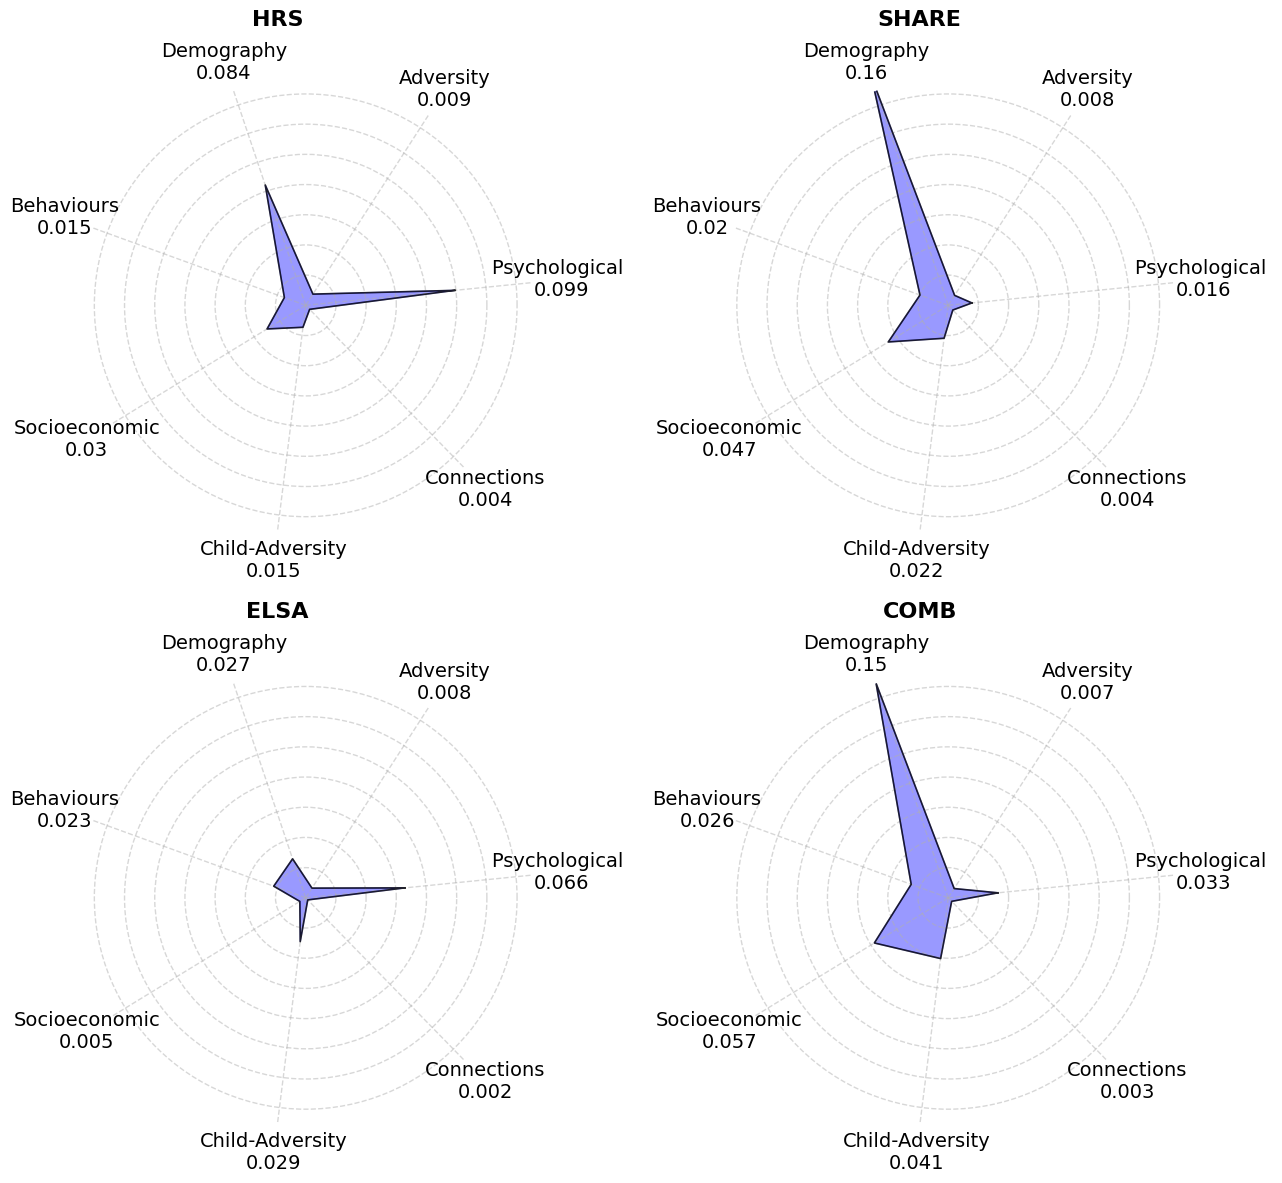

In [256]:
import matplotlib.pyplot as plt
import numpy as np


replace_name_dict={'demographic':'Demography',
                       'child_adverse':'Child-Adversity',
                      'adult_SES':'Socioeconomic',
                      'behavioral':'Behaviours',
                      'adult_adverse':'Adversity',
                      'social_connection':'Connections',
                      'psych':'Psychological ',
                      'bio_adjusted':'Biomarkers',
                       'pr_f1_contribution':'F1 Score',
                       'pr_auc_contribution':'PR-AUC Score',
                      'roc_auc_contribution':'ROC-AUC Score',
                      'imv_contribution':'IMV'}
figure = plt.figure()
fontsize_ticks = 14
fontsize_labels = 16
plt.rcParams["figure.figsize"] = [13,12]
figure.subplots_adjust(left=0.12, bottom=0.1,top=0.995,right=0.995)
datasets = ['hrs','share','elsa','comb']


for m in range(1,5):
    df = contribution.loc[contribution['dataset']==datasets[m-1]].copy()
    eva_score = 'pr_auc'

    # Assuming you have data for seven dimensions
    values = list(df[f'{eva_score}_contribution'])
    values += [values[0]]

    labels = [replace_name_dict[x] for x in df['goal_domain']]

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1] 
    angles = [x+0.1 for x in angles]# Close the heptagon

    axis = figure.add_subplot(int(f'22{m}'), polar=True)

    # Plot the heptagon shape
    if datasets[m-1]=='elsa':
        print(values)
    axis.plot(angles, values, color='black', linewidth=1.2, linestyle='solid',alpha=0.8)
    axis.fill(angles, values, color='blue', alpha=0.4)
    axis.set_ylim([0, max(data)])


    # Set the labels for each dimension
    axis.set_xticks(angles[:-1])
    axis.set_xticklabels([])
    


    axis.spines['polar'].set_visible(False)
    # ax.spines['polar'].set_alpha(0.1)

    # set title 
    axis.text(1.67,0.19,datasets[m-1].upper(), ha='center', va='center',fontsize=fontsize_labels,weight="bold")

    # Add the dimension labels
    for i, angle in enumerate(angles[:-1]):
        x = angle
        y = 0.17
        axis.text(x, y, f'{labels[i]}\n{round(values[i],3)}', ha='center', va='center',fontsize=fontsize_ticks)



        axis.grid(True, linestyle='dashed', linewidth=1, alpha=0.5,which='major')
        axis.set_yticklabels([])

    
    # Set the aspect ratio to equal  
    axis.set_aspect('equal')
figure.tight_layout()
# Show the plot
plt.savefig(Path.cwd() / 'graphs/domain_contribution_all.pdf')
# plt.show()

# Error Investigation 

 HRS as an example 

[22766,
 25612,
 28458,
 31304,
 34150,
 36996,
 39841,
 42687,
 45533,
 48379,
 51225,
 54071,
 56917]

In [38]:
df = params.data_reader(dataset='HRS',source='us',bio=False)
model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain='all', model='lgb', train_subset_size=1, order=0)

In [52]:
df_invs = pd.DataFrame()
df_invs['true'] =  model.y_test 
df_invs['pred'] =  model.test_set_predict
df_invs['pred_prob'] = model.test_set_predict_prob
df_invs['correct']=[1 if x==y else 0 for x,y in zip(df_error['true'],df_error['pred'])]
df_invs[x.columns] = model.X_test

among the 4073 records in the out-of-sample, 3163 are correct, 
910 incorrect ->
264 fp 
646 fn

In [57]:
df_error=df_invs.loc[df_invs['correct']==0]
df_correct=df_invs.loc[df_invs['correct']==1]

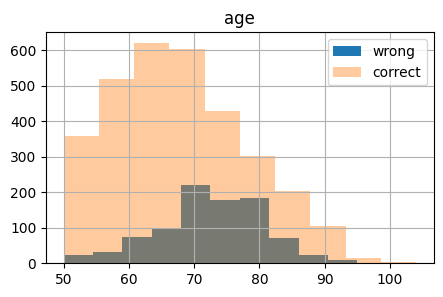

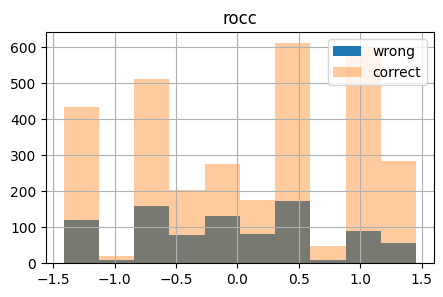

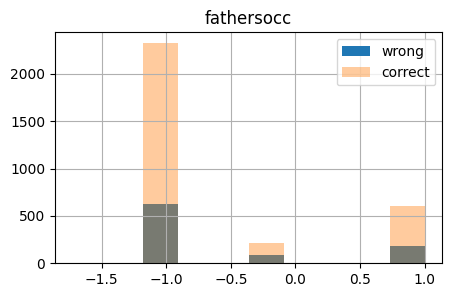

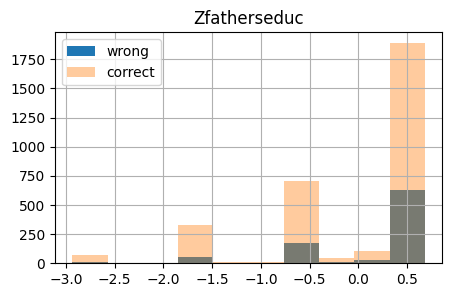

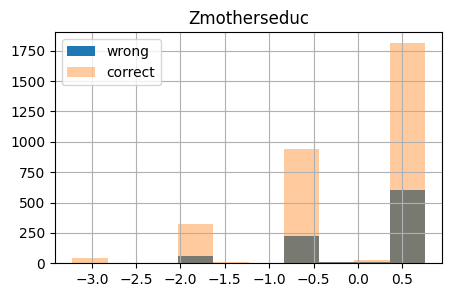

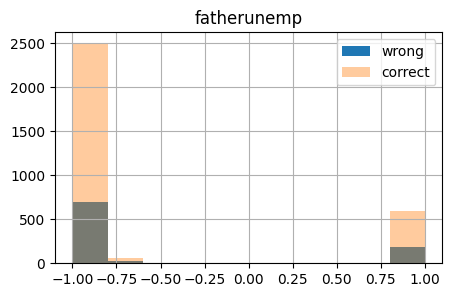

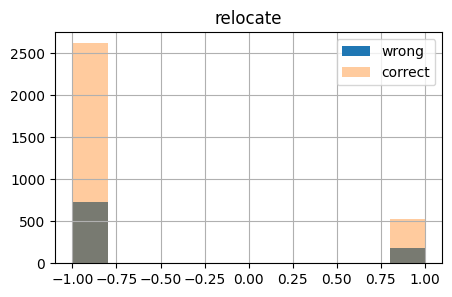

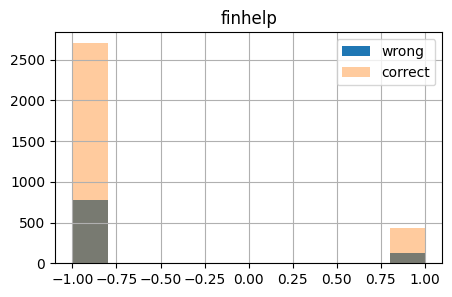

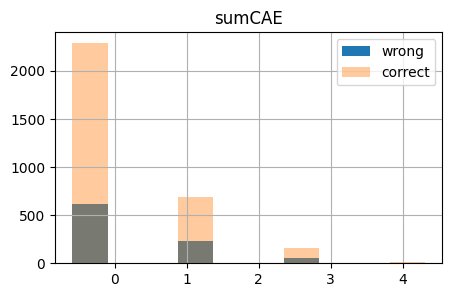

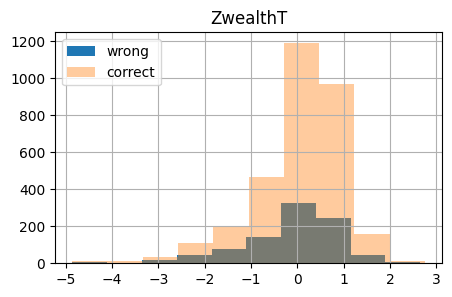

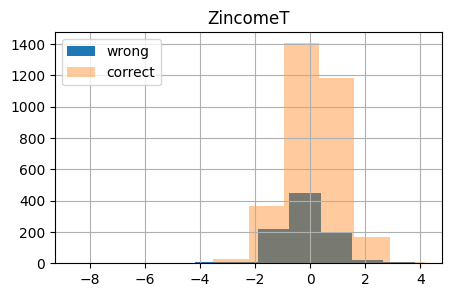

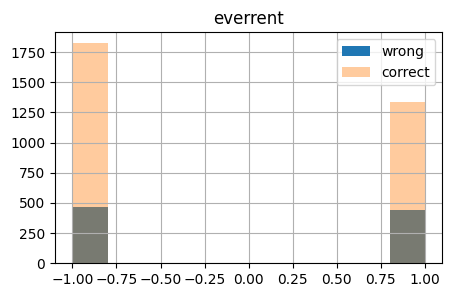

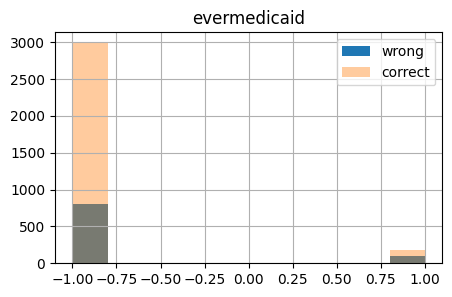

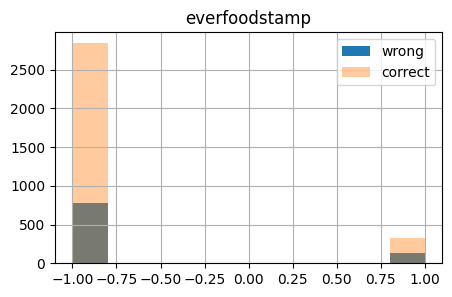

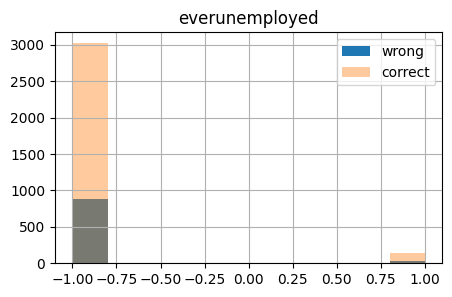

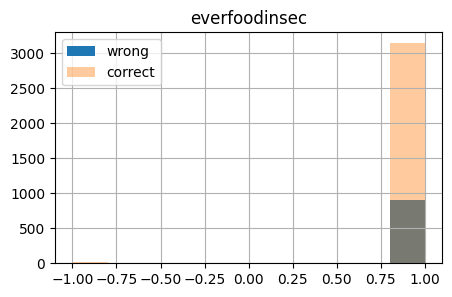

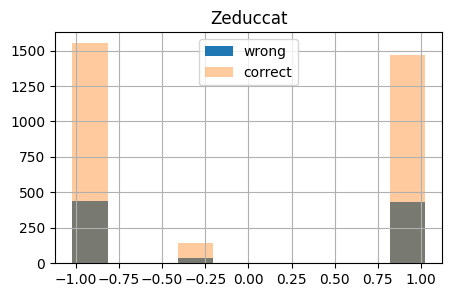

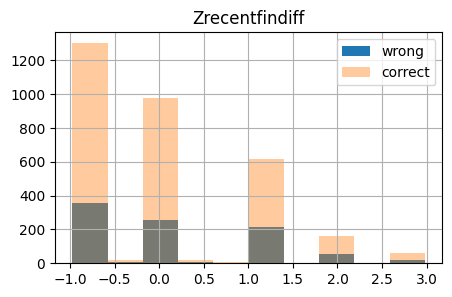

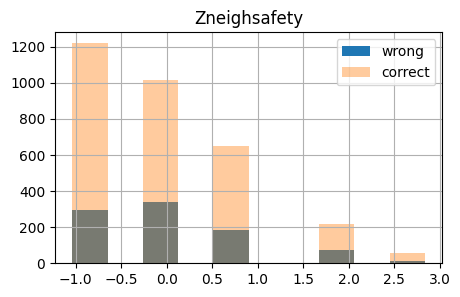

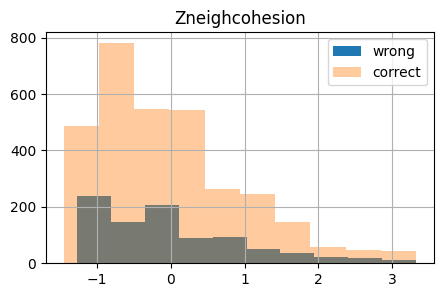

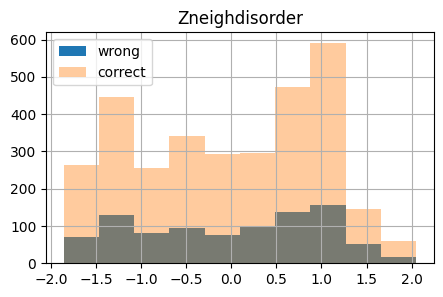

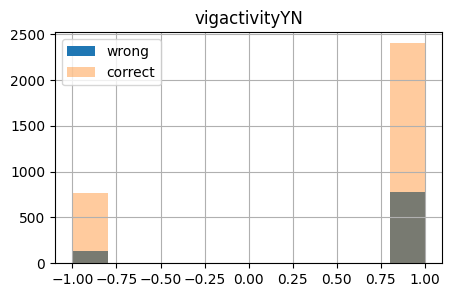

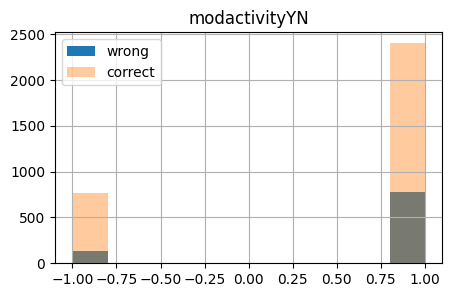

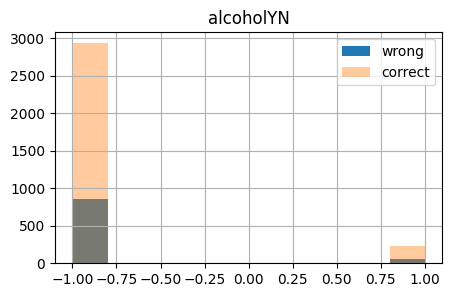

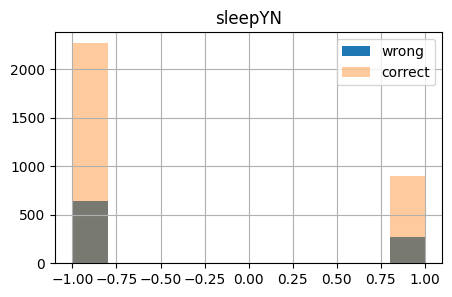

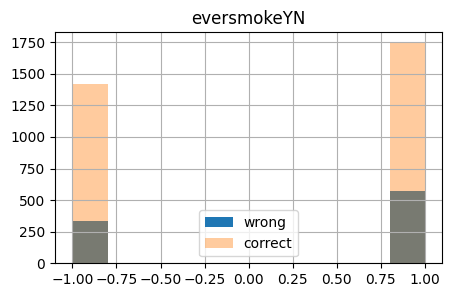

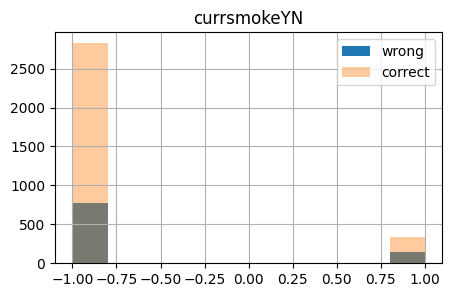

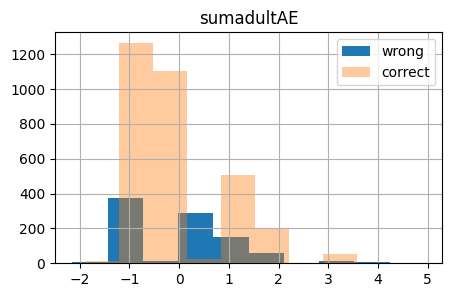

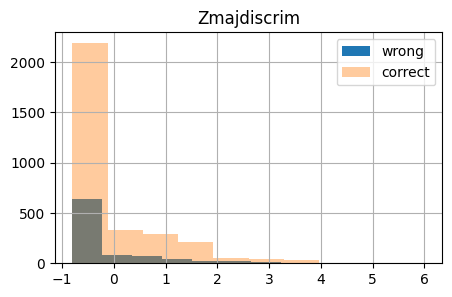

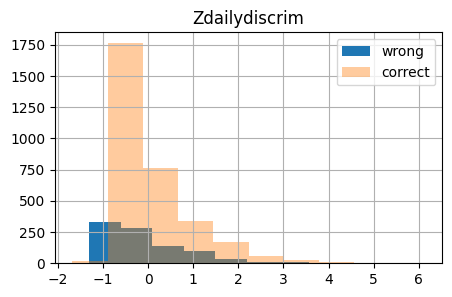

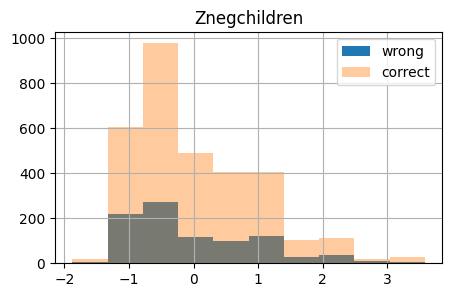

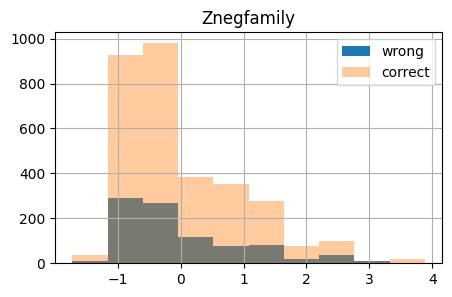

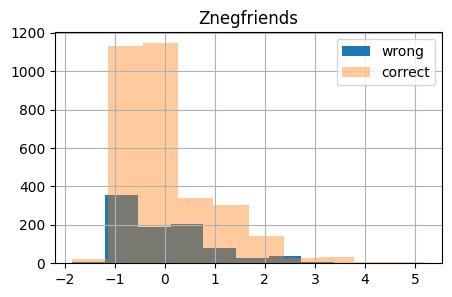

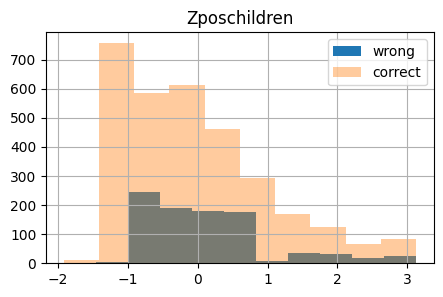

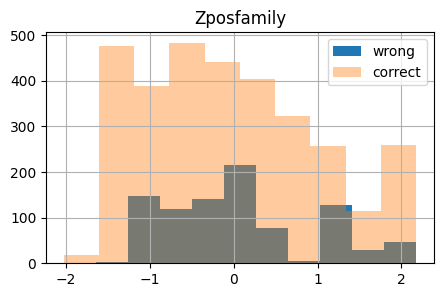

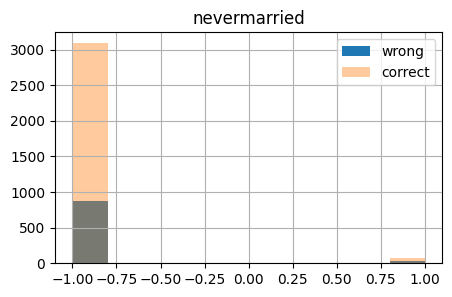

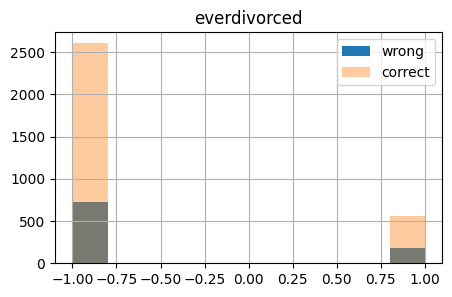

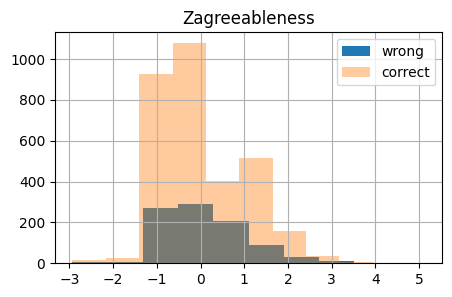

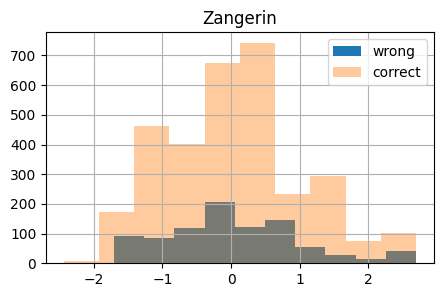

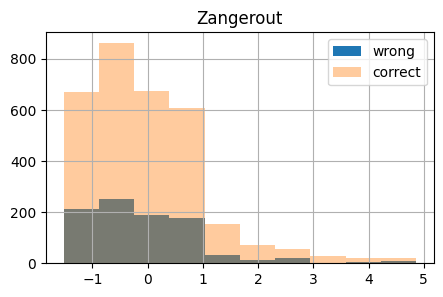

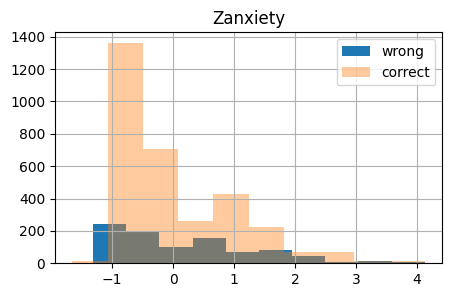

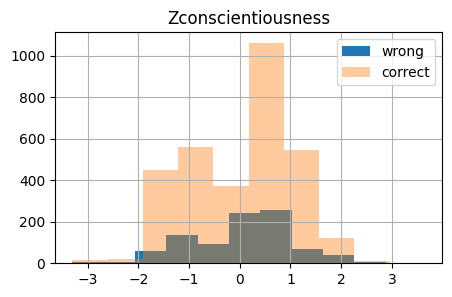

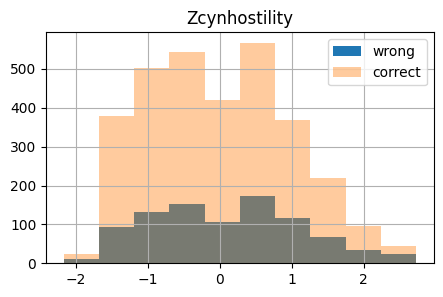

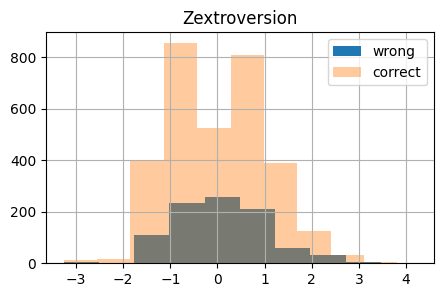

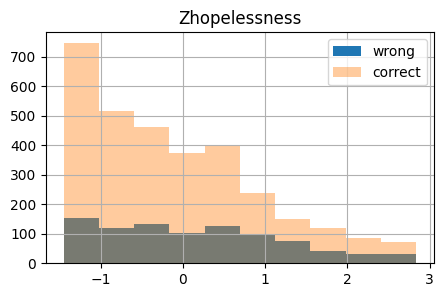

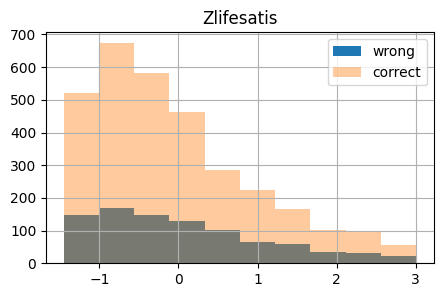

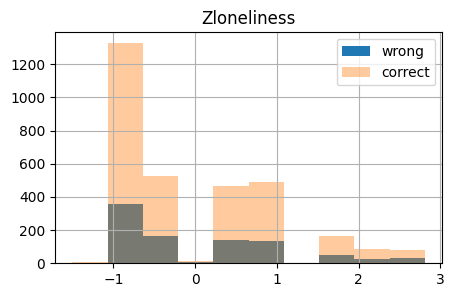

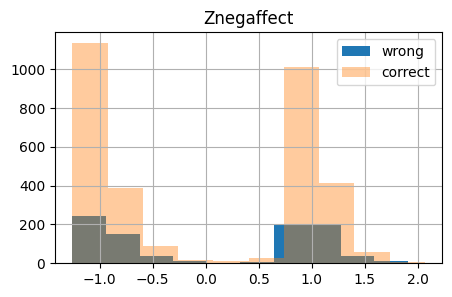

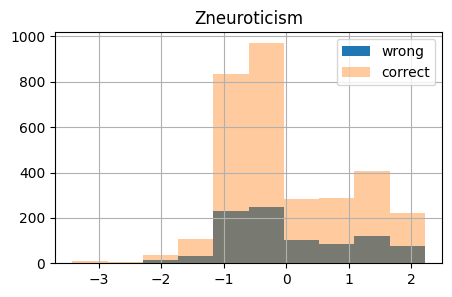

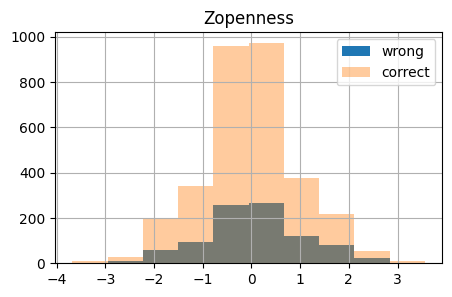

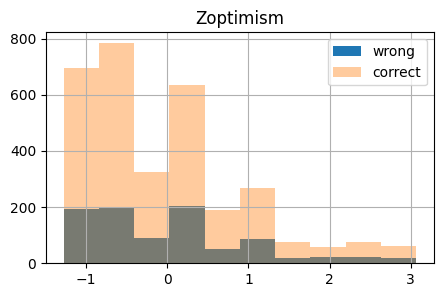

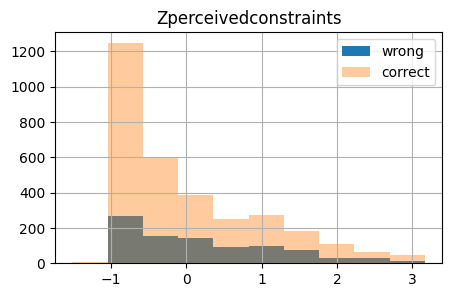

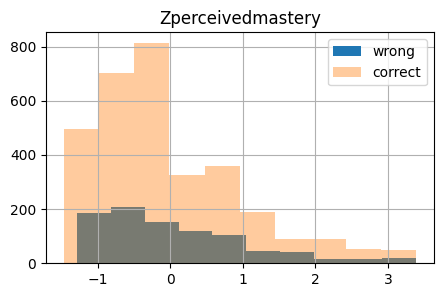

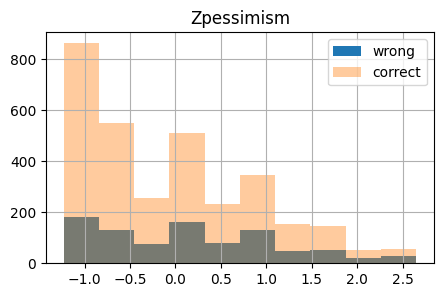

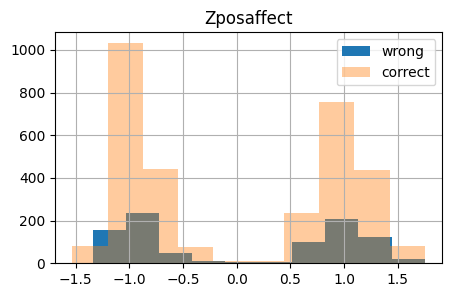

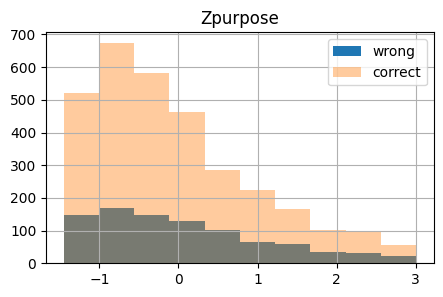

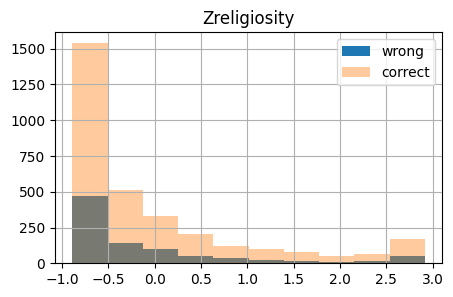

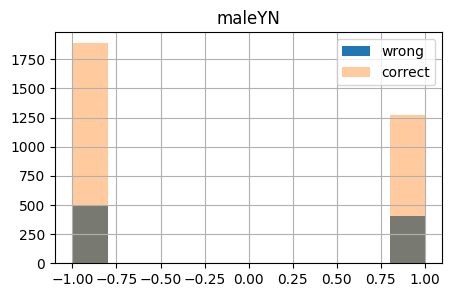

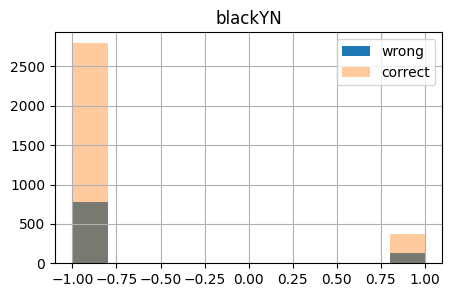

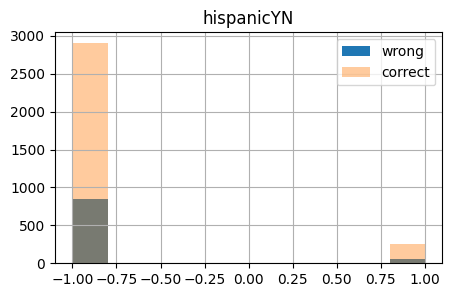

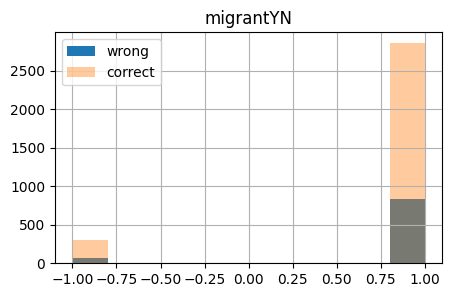

In [81]:
for column in model.X_test.columns:
    # print(column)
    # print(df_error[column].describe())
    fig,ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [5,3]
    df_error[column].hist(ax=ax,label='wrong',alpha=1)
    df_correct[column].hist(ax=ax,label='correct',alpha=0.4)
    ax.set_title(column)
    ax.legend()
    plt.show()
    

In [83]:
# false positive 
df_error_fp = df_error.loc[df_error['true']==0]
# false negative 
df_error_fn = df_error.loc[df_error['true']==1]

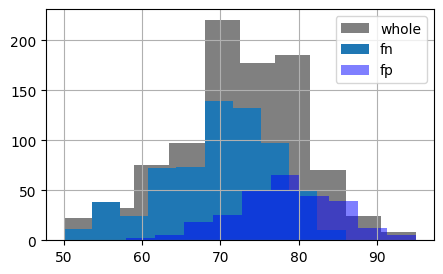

In [100]:
fig,ax = plt.subplots()
df_error.age.hist(ax=ax, label = 'whole',color='grey')
df_error_fn.age.hist(ax=ax, label = 'fn')
df_error_fp.age.hist(ax=ax, label = 'fp',alpha=0.5,color='blue')

ax.legend()

# Age dependent 

# Asymptotics


In [1]:
from src import params
import pandas as pd
from src import Models
from pathlib import Path
from src.Evaluate import metric,print_model_fits,sl_eva,ffc_rsquare,efron_rsquare
from src import Shap
from src import SuperLearner
import random 

platform = "jupyter"
params.confirm_cwd(platform)
model_params = params.model_params


cwd: /Users/valler/Python/OX_Thesis/OX_thesis


## Combination

In [2]:
# read data 
model_params['k'] = 10
model_params['y_colname'] = 'death'
domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


In [7]:
Eva_fixed_test_size = pd.DataFrame(columns=['model', 'var_num','train_subset_size', 'train_auc_score', 'test_auc_score', 'train_f1_score', 'test_f1_score',
                 'test_pr_auc', 'test_pr_no_skill',
                 'train_efron_r2', 'test_efron_r2',
                 'train_ffc_r2', 'test_ffc_r2',
                 'test_briern_r2', 'test_imv_r2'])

In [4]:
start=0.3
end=1.005
step=0.005
model='lgb'
var_set = model_params['domain_dict'][domain_name]

In [8]:
for train_subset_size in np.arange(start, end, step):
    print(train_subset_size)
    for sub_set_size in range(1,len(var_set)+1):
        
        random.seed(1981236101)
        model_params['domain_dict']['sub_set'] = random.sample(var_set,sub_set_size)
        model_=Models.Model_fixed_test_size(data=df, model_params=model_params, domain='sub_set', model=model,
                                             train_subset_size=train_subset_size, order=0)

        eva = metric(model_)
        Eva_fixed_test_size.loc[len(Eva_fixed_test_size)] = [model, sub_set_size,
                                                                         len(model_.X_train),

                                                                         # AUC score
                                                                         eva.test_roc_auc_score_label,
                                                                         eva.auc_score,

                                                                         # F1 score
                                                                         eva.train_f1_score_label,
                                                                         eva.pr_f1,

                                                                         # PR-AUC score
                                                                         eva.pr_auc,
                                                                         eva.pr_no_skill,

                                                                         # Efron_r2
                                                                         efron_rsquare(model_.y_train,
                                                                                               model_.train_set_predict_prob),
                                                                         eva.efron_rsquare,

                                                                         # ffc_r2
                                                                         ffc_rsquare(model_.y_train,
                                                                                              model_.train_set_predict_prob,
                                                                                              model_.y_train),

                                                                         eva.ffc_r2,
                                                                         # brier
                                                                         eva.brier,
                                                                         eva.imv]



0.3
0.305
0.31
0.315
0.32
0.325
0.33
0.335
0.34
0.34500000000000003
0.35000000000000003
0.35500000000000004
0.36000000000000004
0.36500000000000005
0.37000000000000005
0.37500000000000006
0.38000000000000006
0.38500000000000006
0.39000000000000007
0.3950000000000001
0.4000000000000001
0.4050000000000001
0.4100000000000001
0.4150000000000001
0.4200000000000001
0.4250000000000001
0.4300000000000001
0.4350000000000001
0.4400000000000001
0.4450000000000001
0.4500000000000001
0.4550000000000001
0.46000000000000013
0.46500000000000014
0.47000000000000014
0.47500000000000014
0.48000000000000015
0.48500000000000015
0.49000000000000016
0.49500000000000016
0.5000000000000002
0.5050000000000001
0.5100000000000002
0.5150000000000001
0.5200000000000002
0.5250000000000001
0.5300000000000002
0.5350000000000001
0.5400000000000003
0.5450000000000002
0.5500000000000003
0.5550000000000002
0.5600000000000003
0.5650000000000002
0.5700000000000003
0.5750000000000002
0.5800000000000003
0.5850000000000002
0.5

Visualisation

In [13]:
Eva_fixed_test_size

model  var_num  train_subset_size  train_auc_score  test_auc_score  \
0      lgb        1              11952         0.500000        0.521476   
1      lgb        2              11952         0.505492        0.590121   
2      lgb        3              11952         0.512628        0.649224   
3      lgb        4              11952         0.519514        0.650102   
4      lgb        5              11952         0.645245        0.806924   
...    ...      ...                ...              ...             ...   
3661   lgb       22              39841         0.676112        0.838336   
3662   lgb       23              39841         0.677491        0.841193   
3663   lgb       24              39841         0.681954        0.841272   
3664   lgb       25              39841         0.681954        0.841272   
3665   lgb       26              39841         0.682468        0.840904   

      train_f1_score  test_f1_score  test_pr_auc  test_pr_no_skill  \
0           0.000000       0.000000     0.450563          0.221804   
1           0.044299       0.029993     0.301951          0.221804   
2           0.130796       0.069673     0.339975          0.221804   
3           0.178965       0.100786     0.344611          0.221804   
4           0.559212       0.450948     0.570113          0.221804   
...              ...            ...          ...               ...   
3661        0.565082       0.511212     0.625977          0.224643   
3662        0.564840       0.513575     0.630108          0.224643   
3663        0.571905       0.522217     0.633377          0.224643   
3664        0.571905       0.522217     0.633377          0.224643   
3665        0.574676       0.522448     0.630034          0.224643   

      train_efron_r2  test_efron_r2  train_ffc_r2  test_ffc_r2  \
0           0.001350       0.001124      0.001350     0.029827   
1           0.046236       0.019300      0.046236     0.047481   
2           0.143673       0.045117      0.143673     0.072557   
3           0.152818       0.046852      0.152818     0.074241   
4           0.358758       0.235667      0.358758     0.257630   
...              ...            ...           ...          ...   
3661        0.362126       0.287897      0.362126     0.525728   
3662        0.365938       0.293450      0.365938     0.529426   
3663        0.367783       0.295514      0.367783     0.530801   
3664        0.367783       0.295514      0.367783     0.530801   
3665        0.368826       0.292666      0.368826     0.528905   

      test_briern_r2  test_imv_r2  
0           0.175457     0.000687  
1           0.172264     0.009156  
2           0.167730     0.023056  
3           0.167425     0.023761  
4           0.134259     0.100173  
...              ...          ...  
3661        0.125084     0.120690  
3662        0.124109     0.122409  
3663        0.123746     0.122743  
3664        0.123746     0.122743  
3665        0.124246     0.122198  

[3666 rows x 15 columns]

In [10]:
Eva_fixed_test_size.to_csv(Path.cwd()/'results/asymptotics_lgb_with_random_sampling_on_vars_seed_specified.csv',index=False)

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


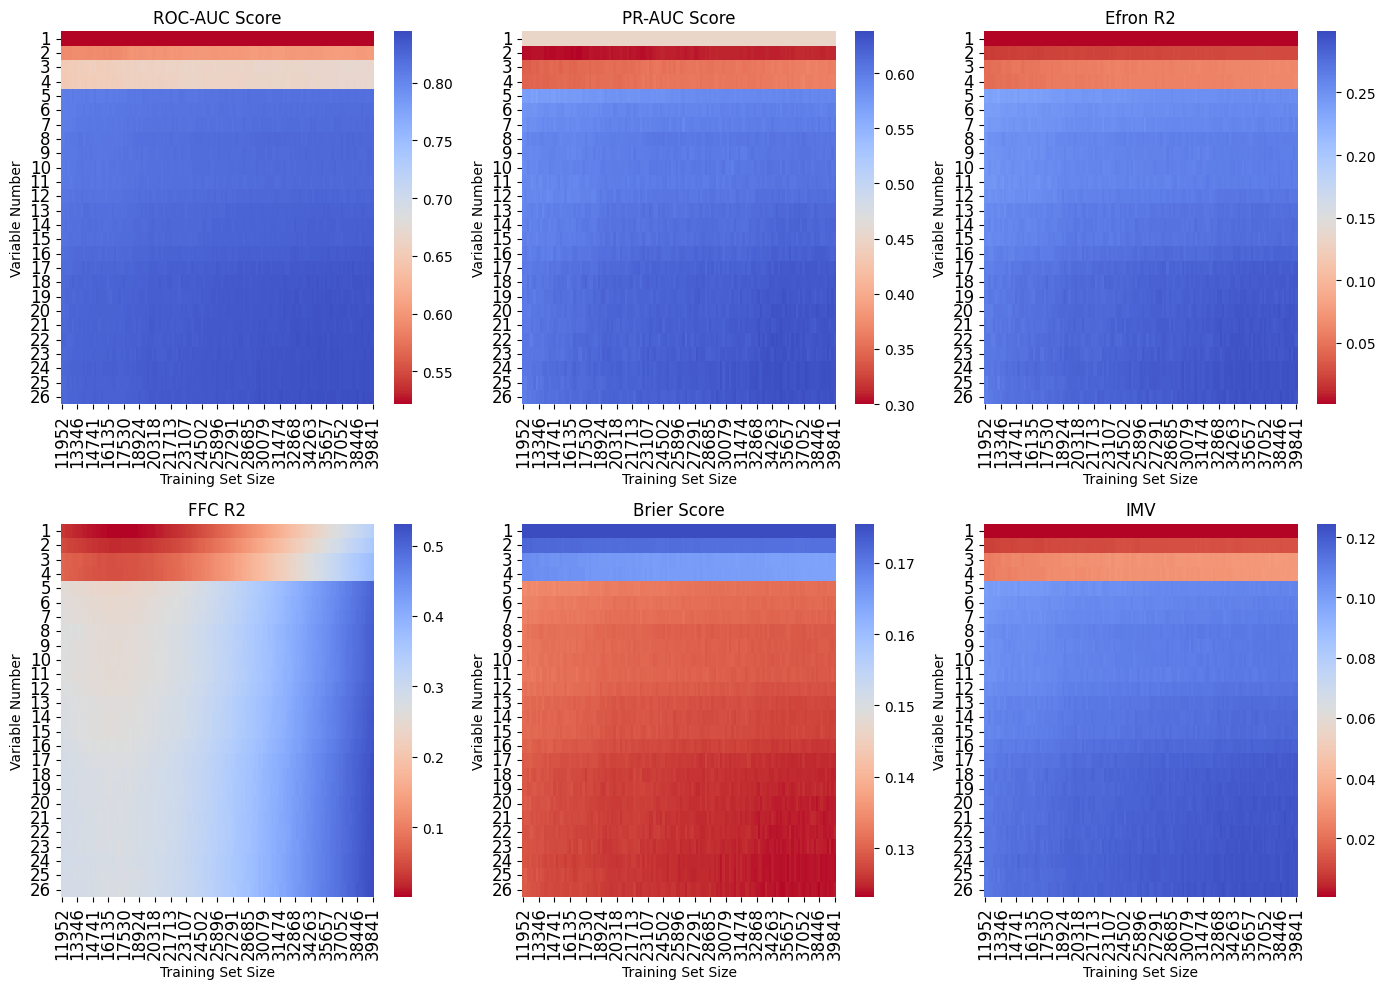

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


columns = []
for column in Eva_fixed_test_size.columns:
    if 'test' in column:
        columns.append(column)

df_to_plot = Eva_fixed_test_size.copy()

columns.remove('test_f1_score')
columns.remove('test_pr_no_skill')

ploted_col_dict = {'test_auc_score': 'ROC-AUC Score',
                   'test_efron_r2': 'Efron R2',
                   'test_pr_auc': 'PR-AUC Score',
                   'test_ffc_r2': 'FFC R2',
                   'test_briern_r2': 'Brier Score',
                   'test_imv_r2': 'IMV'}



fig, axis = plt.subplots(2, 3)
fontsize_ticks = 12
fontsize_labels = 15
fig.subplots_adjust(left=0.08, bottom=0.08, top=0.95, right=0.99)
plt.rcParams['figure.figsize'] = [14, 10]


count = 0
for (m, n), subplot in np.ndenumerate(axis):
    metric = columns[count]
    pivot_table = df_to_plot.pivot('var_num', 'train_subset_size', metric)
    sns.heatmap(pivot_table, ax=axis[m, n],cmap='coolwarm_r')
    
    
    axis[m, n].set_ylabel('Variable Number')
    axis[m, n].set_xlabel('Training Set Size')
    axis[m, n].set_title(ploted_col_dict[metric])#, size=fontsize_labels)
    
    axis[m, n].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
    axis[m, n].spines['top'].set_visible(False)
    axis[m, n].spines['right'].set_visible(False)
    axis[m, n].grid(axis='both', alpha=0.4)
    axis[m, n].set_axisbelow(True)
    count += 1
fig.tight_layout()
plt.show()


## Superlearner Version 

see the single .py file named 'Asymp_SL.py' in folder 'src'


# seed 

In [280]:
import time
import random

domain_name = 'combination_all'
df,model_params['domain_dict'][domain_name] = params.read_merged_data()
model_params['var_dict']['dataset']='Datasource'


In [281]:
df_seed_selection_lst=pd.DataFrame(columns=['seed','model','imv','roc-auc','pr-auc','f1','efron_r2','ffc_r2','IP'])
df_seed_shap_performance_recorder = pd.DataFrame(columns = ['seed','model']+model_params['domain_dict'][domain_name])


In [ ]:

count = 0 
while count <10000:
    seed = random.randint(1, 1000000000)
    model_selection = 'lgb'
    
    
    model_params['random_state']=seed
    model = Models.Model_fixed_test_size(data=df, model_params=model_params, domain=domain_name, model='lgb', train_subset_size=1, order=0)
    
    
    evas = metric(model)

    temp = pd.DataFrame({'seed':seed,'model':model_selection,
                         'imv':evas.imv,'roc-auc':evas.auc_score,
                         'pr-auc':evas.pr_auc,'f1':evas.pr_f1,
                         'efron_r2':evas.efron_rsquare,'ffc_r2':evas.ffc_r2,'IP':evas.pr_no_skill},index=[0])
    df_seed_selection_lst.loc[len(df_seed_selection_lst),] = temp.loc[0,]

    # shap zone 
    shap_values_test,shap_dict = Shap.shap_values_and_dict(model)
    

    # store the mean absolute shap value for each variable in a dictionary
    if len(shap_values_test.shape)==3:
        shap_values_test.values=shap_values_test.values[:,:,1]
    shap_dict = {}
    i = 0
    while i < shap_values_test.values.shape[1]:
        sum_shap = 0
        for m in shap_values_test.values[:, i]:
            sum_shap += np.abs(m)
        shap_dict[shap_values_test.feature_names[i]] = sum_shap / shap_values_test.values.shape[0]
        i += 1
    shap_dict['seed'] = seed
    shap_dict['model'] = model_selection
    temp_shap = pd.DataFrame(shap_dict,index=[0])
    df_seed_shap_performance_recorder.loc[len(df_seed_shap_performance_recorder),] = temp_shap.loc[0,]

    del model, evas
    # rest zone 
    if count % 100 ==0:
        print(f'now seed is {seed} and we take 10s rest')
        print(f'\n{model_selection} and seed is {seed}, count={count}')
        df_seed_selection_lst.to_csv(Path.cwd()/'results/10000seed_comb_model_performance.csv',index=False)
        df_seed_shap_performance_recorder.to_csv(Path.cwd()/'results/10000seed_comb_shap_values.csv',index=False)

        time.sleep(10)
    count+=1
    
df_seed_selection_lst.to_csv(Path.cwd()/'results/10000seed_comb_model_performance.csv',index=False)
df_seed_shap_performance_recorder.to_csv(Path.cwd()/'results/10000seed_comb_shap_values.csv',index=False)


## Performance Plot



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating you

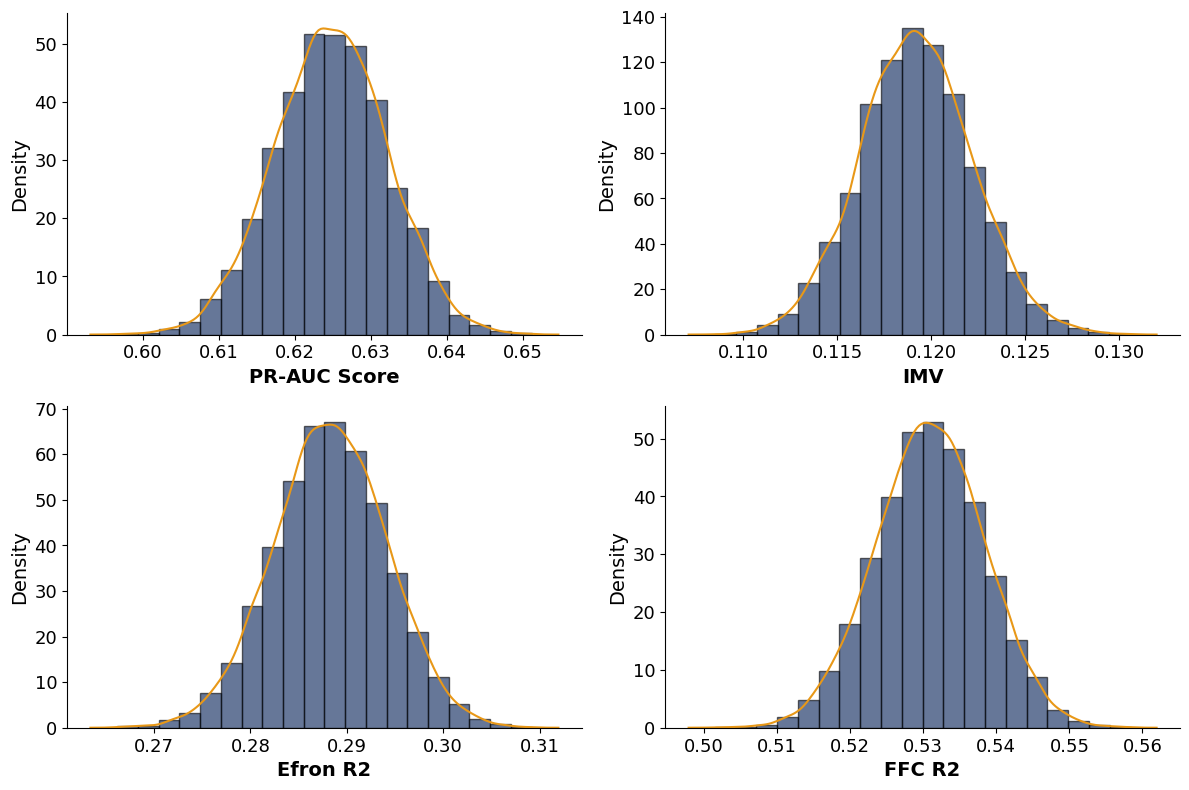

In [293]:
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

df_eval = df_seed_selection_lst.copy()
fig,ax = plt.subplots(2,2)
plt.rcParams["figure.figsize"]=[12,8]
count=0
colums=[ 'pr-auc', 'imv','efron_r2', 'ffc_r2']
column_dict={'roc-auc':'ROC-AUC Score', 'pr-auc':'PR-AUC Score', 'f1':'F1', 'efron_r2':'Efron R2', 'ffc_r2':'FFC R2', 'imv':'IMV'}
fig.subplots_adjust(left=0.09, top=0.98, bottom=0.06, right=0.95)

colors = ['#001c54', '#E89818']
letter_fontsize = 15
label_fontsize = 13
for (m, n), subplot in np.ndenumerate(ax):

    sns.distplot(df_eval[colums[count]],
                 hist_kws={'facecolor': colors[0],'edgecolor': 'k','alpha': 0.6,},
                 kde_kws={'color': colors[1]}, ax=ax[m,n], bins=20)
    # ax[m,n].hist(df_eval[colums[count]],color=color_blue,alpha=0.75,bins=30,edgecolor='black')
    ax[m, n].set_xlabel(column_dict[colums[count]],fontsize=label_fontsize+1,weight='bold')
    ax[m, n].set_ylabel('Density',fontsize=label_fontsize + 1)
    ax[m,n].tick_params(axis='both', which='major', labelsize=label_fontsize)
    count+=1
    ax[m, n].spines['top'].set_visible(False)
    ax[m, n].spines['right'].set_visible(False)
fig.tight_layout()
# plt.show()


plt.savefig(Path.cwd()/'graphs/seed_lgb_10000_seed_distributions.pdf')

In [299]:
len(df_seed_selection_lst['seed'].unique())

10000

In [297]:
df_table_2 = pd.DataFrame(columns=['metric','mean','min','max','standard deviation'])
for metric in ['pr-auc','imv','efron_r2','ffc_r2']:
    df_table_2.loc[len(df_table_2),]=[metric,
                                      df_seed_selection_lst[metric].mean(),
                                      df_seed_selection_lst[metric].min(), 
                                      df_seed_selection_lst[metric].max(), 
                                      df_seed_selection_lst[metric].std()]

In [305]:
# df_table_2 = pd.DataFrame(columns=['metric','mean','min','max','standard deviation'])
columns =list(df_seed_shap_performance_recorder.columns)
columns.remove('seed')
columns.remove('model')
              
for column in columns:
    if df_seed_shap_performance_recorder[column].mean()>=0.1:
        df_table_2.loc[len(df_table_2),]=[column,
                                          df_seed_shap_performance_recorder[column].mean(),
                                          df_seed_shap_performance_recorder[column].min(), 
                                          df_seed_shap_performance_recorder[column].max(), 
                                          df_seed_shap_performance_recorder[column].std()]


In [306]:
df_table_2

metric      mean       min       max standard deviation
0         pr-auc  0.624782  0.596617  0.651167           0.007409
1            imv  0.119216  0.108524  0.130572           0.002988
2       efron_r2  0.288267  0.266192  0.309161            0.00587
3         ffc_r2  0.530961  0.501446  0.558391           0.007451
4    currsmokeYN  0.140681  0.090471  0.186679           0.012491
5            age  0.964599  0.926125  1.004025           0.010889
6  modactivityYN  0.115472  0.070729  0.149918            0.01011
7         maleYN  0.229235   0.19567   0.27235           0.010056

In [308]:
list(df_table_2.metric)

['pr-auc',
 'imv',
 'efron_r2',
 'ffc_r2',
 'currsmokeYN',
 'age',
 'modactivityYN',
 'maleYN']

In [313]:
replace_dic={'pr-auc':"PR-AUC",
 'imv':"IMV",
 'efron_r2':"Efron $R^2$",
 'ffc_r2':"FFC $R^2$",
 'currsmokeYN':'Current Smoker',
 'age':'Age',
 'modactivityYN':"Low/No Moderate Activity",
 'maleYN':'Male'}
for eva in df_table_2.metric:
    print("& {} & {} & {} & {} & {} \\\\".format(replace_dic[eva],
                                            round(df_table_2.loc[(df_table_2['metric']==eva),'mean'].values[0],3),
                                            round(df_table_2.loc[(df_table_2['metric']==eva),'min'].values[0],3),
                                            round(df_table_2.loc[(df_table_2['metric']==eva),'max'].values[0],3),
                                            round(df_table_2.loc[(df_table_2['metric']==eva),'standard deviation'].values[0],3)))
    
    
    
    

& PR-AUC & 0.625 & 0.597 & 0.651 & 0.007 \\
& IMV & 0.119 & 0.109 & 0.131 & 0.003 \\
& Efron $R^2$ & 0.288 & 0.266 & 0.309 & 0.006 \\
& FFC $R^2$ & 0.531 & 0.501 & 0.558 & 0.007 \\
& Current Smoker & 0.141 & 0.09 & 0.187 & 0.012 \\
& Age & 0.965 & 0.926 & 1.004 & 0.011 \\
& Low/No Moderate Activity & 0.115 & 0.071 & 0.15 & 0.01 \\
& Male & 0.229 & 0.196 & 0.272 & 0.01 \\


In [315]:
for eva in df_table_2.metric:
    print("{}".format(replace_dic[eva],round(df_table_2.loc[(df_table_2['metric']==eva),'max'].values[0]-df_table_2.loc[(df_table_2['metric']==eva),'min'].values[0],3)))
                                        
    

PR-AUC 0.055
IMV 0.022
Efron $R^2$ 0.043
FFC $R^2$ 0.057
Current Smoker 0.096
Age 0.078
Low/No Moderate Activity 0.079
Male 0.077
